# Introduction

Muflih Hafidz Danurhadi RMT 020

saya akan menganalisa dan mem-forecast 10 saham yaitu: ['BBCA.JK', 'TLKM.JK','ASII.JK','BBRI.JK','SIDO.JK','PGAS.JK','ADRO.JK','KAEF.JK','ANTM.JK','INDY.JK']
dan memberikan opsi untuk pembelian saham 30 hari kerja yang bertujuan untuk meningkatkan profit dalam pemutaran uang di bank. melakukan analisa model forecasting dan meng improve model tersebut.

# Import Libraries

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import ta
import scipy.stats as stats
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from sklearn.model_selection import train_test_split
from math import sqrt
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1
from tensorflow.keras.layers import LayerNormalization
from tensorflow.keras.layers import Input, Dense, concatenate, GRU, Dropout,LSTM, Bidirectional, Flatten
from sklearn.metrics import mean_squared_error
from tensorflow.keras import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
# model saving and inference
import pickle
import json

In [8]:
def get_stock_data(symbol, start_date, end_date):
  stock_data = yf.download(symbol, start=start_date, end=end_date)
  return stock_data

symbols = ['ADRO.JK','ANTM.JK','ASII.JK',	'BBCA.JK'	,'BBRI.JK',	'INDY.JK'	,'KAEF.JK',	'PGAS.JK',	'SIDO.JK'	,'TLKM.JK']
#today = datetime.today().date()
today_str = '2023-08-11'
today = datetime.strptime(today_str, '%Y-%m-%d')
end_date = today.strftime('%Y-%m-%d')
#start_date = (today - timedelta(days=10)).strftime('%Y-%m-%d')
start_date = (today - timedelta(days=9*30)).strftime('%Y-%m-%d')

stock_data = get_stock_data(symbols, start_date, end_date)
stock_df = pd.DataFrame(stock_data.round())

[*********************100%***********************]  10 of 10 completed


menyimpan data dalam bentuk csv

In [9]:
#stock_df['Adj Close'].to_csv('stock_data.csv', index=True,header=True) 

In [8]:
print("Start Date:", start_date)
print("End Date:", end_date)
stock_df.head(10)

Start Date: 2022-11-14
End Date: 2023-08-11


Adj Close                                                          \
             ADRO.JK ANTM.JK ASII.JK BBCA.JK BBRI.JK INDY.JK KAEF.JK PGAS.JK   
Date                                                                           
2022-11-14    2951.0  2036.0  5773.0  8545.0  4310.0  2502.0  1485.0  1631.0   
2022-11-15    2960.0  2075.0  5704.0  8594.0  4310.0  2548.0  1385.0  1622.0   
2022-11-16    3010.0  1950.0  5659.0  8399.0  4253.0  2539.0  1405.0  1627.0   
2022-11-17    3027.0  1897.0  5773.0  8521.0  4394.0  2548.0  1380.0  1622.0   
2022-11-18    3027.0  1882.0  5704.0  8618.0  4338.0  2548.0  1415.0  1618.0   
2022-11-21    3112.0  1882.0  5796.0  8521.0  4319.0  2593.0  1400.0  1622.0   
2022-11-22    3120.0  1858.0  5704.0  8692.0  4319.0  2593.0  1330.0  1695.0   
2022-11-23    3162.0  1897.0  5681.0  8667.0  4394.0  2593.0  1295.0  1708.0   
2022-11-24    3162.0  1892.0  5681.0  8789.0  4441.0  2602.0  1290.0  1690.0   
2022-11-25    3145.0  1873.0  5659.0  8765.0  4470.0  2566.0  1280.0  1672.0   

                            ...    Volume                                  \
           SIDO.JK TLKM.JK  ...   ADRO.JK    ANTM.JK   ASII.JK    BBCA.JK   
Date                        ...                                             
2022-11-14   744.0  3886.0  ...  60258000  148342000  46011200   49208200   
2022-11-15   749.0  3886.0  ...  55915600  165401200  65536000   59092900   
2022-11-16   744.0  3886.0  ...  86525300  174441800  60298900  143424800   
2022-11-17   739.0  3877.0  ...  73229600  149717300  35165100   72679800   
2022-11-18   734.0  3848.0  ...  40162000   59274700  29302300   83556900   
2022-11-21   749.0  3867.0  ...  65550500   54986700  19074900   35901000   
2022-11-22   749.0  3838.0  ...  59965000   56464900  33102700   84684200   
2022-11-23   744.0  3810.0  ...  45573200   55881800  30863200   84642100   
2022-11-24   744.0  3867.0  ...  24418800   35329400  21534300   53520800   
2022-11-25   754.0  3867.0  ...  33140500   30261700  40948100   75048300   

                                                                           
              BBRI.JK   INDY.JK   KAEF.JK    PGAS.JK   SIDO.JK    TLKM.JK  
Date                                                                       
2022-11-14  140187600  15040900  13425400   60707500  46074300  188771200  
2022-11-15   87986300   8331800  32647000   45414100  39228800   88570400  
2022-11-16  245789200  10779500   3449400   34721300  23613400  149512300  
2022-11-17  214514600   8876100   1686800   56500000  15912400   68616700  
2022-11-18  105313200   5270500   2075200   21912100   7150000  115907900  
2022-11-21   82279300   9526900   1317700   15603200  27438400   45277400  
2022-11-22  154866000   7939500   2021100  123915200  30027800   83888300  
2022-11-23  147280600   6760000   1495600   50996500  28789000   95750400  
2022-11-24  156735700   3821600    506800   19981700   8337600   50741600  
2022-11-25  177861100   4134100    535900   20408000  12173100   73305800  

[10 rows x 60 columns]

In [9]:
stock_df.tail(10)

Adj Close                                                          \
             ADRO.JK ANTM.JK ASII.JK BBCA.JK BBRI.JK INDY.JK KAEF.JK PGAS.JK   
Date                                                                           
2023-07-28    2470.0  1960.0  6625.0  9125.0  5700.0  2140.0   835.0  1370.0   
2023-07-31    2410.0  1985.0  6850.0  9125.0  5650.0  1975.0   850.0  1365.0   
2023-08-01    2390.0  2040.0  6875.0  9125.0  5700.0  1940.0   900.0  1385.0   
2023-08-02    2370.0  2010.0  6850.0  9200.0  5700.0  1935.0   875.0  1380.0   
2023-08-03    2360.0  2010.0  6825.0  9250.0  5700.0  1970.0   870.0  1385.0   
2023-08-04    2400.0  2020.0  6800.0  9150.0  5575.0  1980.0   880.0  1390.0   
2023-08-07    2380.0  2040.0  6875.0  9275.0  5700.0  1955.0   855.0  1395.0   
2023-08-08    2370.0  2010.0  6850.0  9200.0  5625.0  1960.0   845.0  1400.0   
2023-08-09    2400.0  2010.0  6875.0  9400.0  5700.0  1955.0   820.0  1395.0   
2023-08-10    2410.0  1990.0  6750.0  9400.0  5700.0  2000.0   830.0  1400.0   

                            ...    Volume                                 \
           SIDO.JK TLKM.JK  ...   ADRO.JK    ANTM.JK   ASII.JK   BBCA.JK   
Date                        ...                                            
2023-07-28   640.0  3720.0  ...  40850500   36810200  28288300  74510200   
2023-07-31   640.0  3720.0  ...  64743500   33449700  87828900  80868000   
2023-08-01   640.0  3750.0  ...  23569300  136288500  29425300  49756400   
2023-08-02   615.0  3690.0  ...  21765400   78406600  29463700  60629900   
2023-08-03   640.0  3720.0  ...  18908200   38816800  29272000  64596100   
2023-08-04   640.0  3690.0  ...  26476900   40798600  16646300  52675900   
2023-08-07   650.0  3680.0  ...  20598900   41290300  32608000  55589300   
2023-08-08   655.0  3730.0  ...  22669900   22252100  16515100  43373400   
2023-08-09   640.0  3770.0  ...  22561900   28570200  13781700  77056800   
2023-08-10   640.0  3800.0  ...  42703500   25992700  32076700  76738100   

                                                                         
              BBRI.JK   INDY.JK  KAEF.JK   PGAS.JK   SIDO.JK    TLKM.JK  
Date                                                                     
2023-07-28   74036700   5970200   136300  21640200  69263400  181626700  
2023-07-31  186727400  31225400   820600  44161500  81999200  153583300  
2023-08-01  100137500   8307500  4517600  44442100  40438300   97680500  
2023-08-02   90611300   2521300  1506000  28482300  84090500  121333500  
2023-08-03   82775000   4490500   516800  22444100  54992300   82013300  
2023-08-04  150738500   3957000   284800  35422100  28148500   67746800  
2023-08-07   88104900   5698600   697900  22281000  31147200   94909700  
2023-08-08   89189600   2835500   914400  29729400  25307200  116329400  
2023-08-09   91930000   4567400  1378900  26589000  24655000  129416100  
2023-08-10   85474200  12827700   282000  47679500  13968400  140158900  

[10 rows x 60 columns]

* Open - Opening values of the stock
* High - Highest value of the stock in a day
* Low	- Lowest values of the stock in a day
* Close - Closing values of the stock (in domestic currency)
* Adj Close  - Adjusted Closing values of the stock (After a dividend is announced)
* Volume - Volume of stocks traded

# Explanatory Data Analysis

## Stock Analysis

melihat data 10 hari terakhir dari tiap bagian untuk memberikan gambaran data

In [10]:
stock_df['Adj Close'].tail(10)

,ADRO.JK,ANTM.JK,ASII.JK,BBCA.JK,BBRI.JK,INDY.JK,KAEF.JK,PGAS.JK,SIDO.JK,TLKM.JK
Date,,,,,,,,,,
2023-07-28,2470.0,1960.0,6625.0,9125.0,5700.0,2140.0,835.0,1370.0,640.0,3720.0
2023-07-31,2410.0,1985.0,6850.0,9125.0,5650.0,1975.0,850.0,1365.0,640.0,3720.0
2023-08-01,2390.0,2040.0,6875.0,9125.0,5700.0,1940.0,900.0,1385.0,640.0,3750.0
2023-08-02,2370.0,2010.0,6850.0,9200.0,5700.0,1935.0,875.0,1380.0,615.0,3690.0
2023-08-03,2360.0,2010.0,6825.0,9250.0,5700.0,1970.0,870.0,1385.0,640.0,3720.0
2023-08-04,2400.0,2020.0,6800.0,9150.0,5575.0,1980.0,880.0,1390.0,640.0,3690.0
2023-08-07,2380.0,2040.0,6875.0,9275.0,5700.0,1955.0,855.0,1395.0,650.0,3680.0
2023-08-08,2370.0,2010.0,6850.0,9200.0,5625.0,1960.0,845.0,1400.0,655.0,3730.0
2023-08-09,2400.0,2010.0,6875.0,9400.0,5700.0,1955.0,820.0,1395.0,640.0,3770.0


In [11]:
stock_df['Close'].tail(10)

,ADRO.JK,ANTM.JK,ASII.JK,BBCA.JK,BBRI.JK,INDY.JK,KAEF.JK,PGAS.JK,SIDO.JK,TLKM.JK
Date,,,,,,,,,,
2023-07-28,2470.0,1960.0,6625.0,9125.0,5700.0,2140.0,835.0,1370.0,640.0,3720.0
2023-07-31,2410.0,1985.0,6850.0,9125.0,5650.0,1975.0,850.0,1365.0,640.0,3720.0
2023-08-01,2390.0,2040.0,6875.0,9125.0,5700.0,1940.0,900.0,1385.0,640.0,3750.0
2023-08-02,2370.0,2010.0,6850.0,9200.0,5700.0,1935.0,875.0,1380.0,615.0,3690.0
2023-08-03,2360.0,2010.0,6825.0,9250.0,5700.0,1970.0,870.0,1385.0,640.0,3720.0
2023-08-04,2400.0,2020.0,6800.0,9150.0,5575.0,1980.0,880.0,1390.0,640.0,3690.0
2023-08-07,2380.0,2040.0,6875.0,9275.0,5700.0,1955.0,855.0,1395.0,650.0,3680.0
2023-08-08,2370.0,2010.0,6850.0,9200.0,5625.0,1960.0,845.0,1400.0,655.0,3730.0
2023-08-09,2400.0,2010.0,6875.0,9400.0,5700.0,1955.0,820.0,1395.0,640.0,3770.0


In [12]:
stock_df['High'].tail(10)

,ADRO.JK,ANTM.JK,ASII.JK,BBCA.JK,BBRI.JK,INDY.JK,KAEF.JK,PGAS.JK,SIDO.JK,TLKM.JK
Date,,,,,,,,,,
2023-07-28,2480.0,1975.0,6625.0,9225.0,5700.0,2160.0,845.0,1375.0,650.0,3750.0
2023-07-31,2470.0,1990.0,6950.0,9200.0,5700.0,2100.0,865.0,1385.0,660.0,3750.0
2023-08-01,2410.0,2060.0,6900.0,9175.0,5750.0,1975.0,915.0,1395.0,655.0,3780.0
2023-08-02,2380.0,2050.0,6850.0,9200.0,5725.0,1960.0,915.0,1390.0,645.0,3740.0
2023-08-03,2390.0,2020.0,6900.0,9300.0,5750.0,1985.0,885.0,1390.0,650.0,3760.0
2023-08-04,2440.0,2040.0,6850.0,9275.0,5725.0,2010.0,885.0,1410.0,655.0,3730.0
2023-08-07,2400.0,2050.0,6900.0,9275.0,5725.0,1985.0,885.0,1395.0,655.0,3720.0
2023-08-08,2420.0,2050.0,6900.0,9300.0,5750.0,1985.0,865.0,1405.0,660.0,3760.0
2023-08-09,2400.0,2020.0,6875.0,9400.0,5725.0,1975.0,855.0,1405.0,655.0,3800.0


In [13]:
stock_df['Low'].tail(10)

,ADRO.JK,ANTM.JK,ASII.JK,BBCA.JK,BBRI.JK,INDY.JK,KAEF.JK,PGAS.JK,SIDO.JK,TLKM.JK
Date,,,,,,,,,,
2023-07-28,2410.0,1955.0,6475.0,9125.0,5625.0,2100.0,830.0,1355.0,635.0,3690.0
2023-07-31,2380.0,1960.0,6725.0,9100.0,5650.0,1970.0,830.0,1365.0,635.0,3670.0
2023-08-01,2370.0,1990.0,6800.0,9100.0,5650.0,1940.0,855.0,1365.0,640.0,3700.0
2023-08-02,2340.0,1990.0,6775.0,9125.0,5650.0,1930.0,860.0,1370.0,610.0,3680.0
2023-08-03,2350.0,1990.0,6775.0,9150.0,5650.0,1935.0,865.0,1370.0,615.0,3670.0
2023-08-04,2390.0,2000.0,6750.0,9125.0,5575.0,1980.0,860.0,1385.0,635.0,3690.0
2023-08-07,2360.0,2020.0,6750.0,9150.0,5575.0,1955.0,855.0,1380.0,640.0,3680.0
2023-08-08,2370.0,2000.0,6825.0,9200.0,5600.0,1955.0,830.0,1395.0,650.0,3680.0
2023-08-09,2370.0,1990.0,6825.0,9250.0,5625.0,1955.0,820.0,1385.0,640.0,3740.0


In [14]:
stock_df['Open'].tail(10)

,ADRO.JK,ANTM.JK,ASII.JK,BBCA.JK,BBRI.JK,INDY.JK,KAEF.JK,PGAS.JK,SIDO.JK,TLKM.JK
Date,,,,,,,,,,
2023-07-28,2440.0,1970.0,6500.0,9200.0,5625.0,2130.0,840.0,1365.0,650.0,3710.0
2023-07-31,2470.0,1965.0,6750.0,9175.0,5700.0,2100.0,835.0,1370.0,640.0,3700.0
2023-08-01,2410.0,2000.0,6875.0,9175.0,5650.0,1975.0,855.0,1370.0,640.0,3700.0
2023-08-02,2380.0,2050.0,6825.0,9125.0,5650.0,1940.0,900.0,1390.0,640.0,3740.0
2023-08-03,2370.0,2000.0,6800.0,9150.0,5675.0,1935.0,865.0,1375.0,615.0,3670.0
2023-08-04,2390.0,2010.0,6825.0,9250.0,5700.0,1980.0,870.0,1390.0,640.0,3720.0
2023-08-07,2400.0,2030.0,6825.0,9150.0,5600.0,1980.0,880.0,1390.0,645.0,3700.0
2023-08-08,2400.0,2050.0,6850.0,9275.0,5700.0,1975.0,855.0,1400.0,650.0,3680.0
2023-08-09,2390.0,2010.0,6850.0,9275.0,5650.0,1970.0,845.0,1400.0,655.0,3750.0


In [15]:
stock_df['Volume'].tail(10)

,ADRO.JK,ANTM.JK,ASII.JK,BBCA.JK,BBRI.JK,INDY.JK,KAEF.JK,PGAS.JK,SIDO.JK,TLKM.JK
Date,,,,,,,,,,
2023-07-28,40850500,36810200,28288300,74510200,74036700,5970200,136300,21640200,69263400,181626700
2023-07-31,64743500,33449700,87828900,80868000,186727400,31225400,820600,44161500,81999200,153583300
2023-08-01,23569300,136288500,29425300,49756400,100137500,8307500,4517600,44442100,40438300,97680500
2023-08-02,21765400,78406600,29463700,60629900,90611300,2521300,1506000,28482300,84090500,121333500
2023-08-03,18908200,38816800,29272000,64596100,82775000,4490500,516800,22444100,54992300,82013300
2023-08-04,26476900,40798600,16646300,52675900,150738500,3957000,284800,35422100,28148500,67746800
2023-08-07,20598900,41290300,32608000,55589300,88104900,5698600,697900,22281000,31147200,94909700
2023-08-08,22669900,22252100,16515100,43373400,89189600,2835500,914400,29729400,25307200,116329400
2023-08-09,22561900,28570200,13781700,77056800,91930000,4567400,1378900,26589000,24655000,129416100


### trend tiap saham 

untuk melihat pergerakan dan trend tiap saham

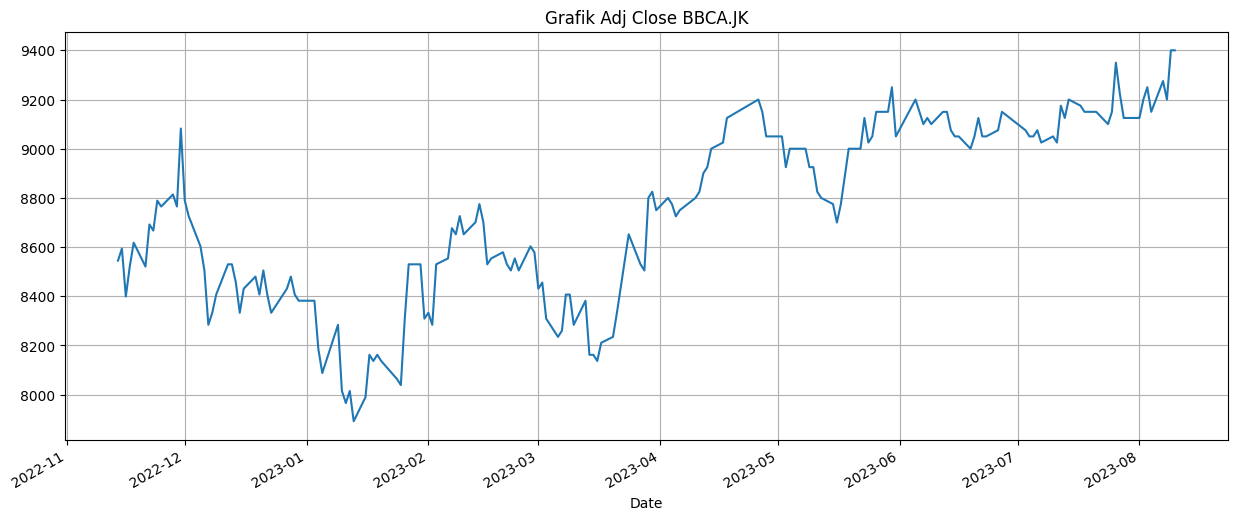

Max BBCA.JK: 9400.0
Min BBCA.JK: 7892.0


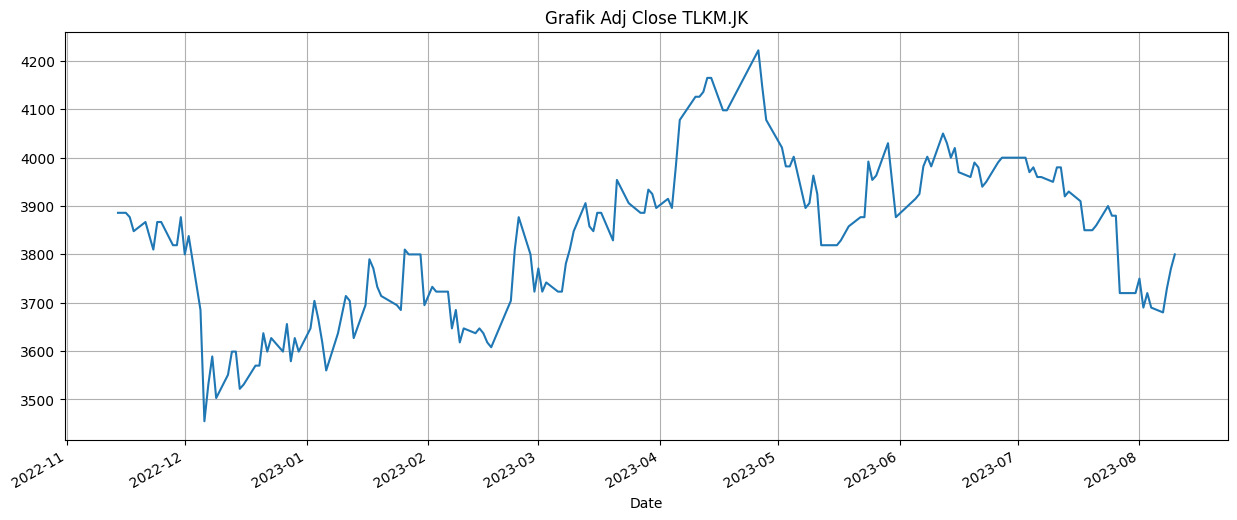

Max TLKM.JK: 4222.0
Min TLKM.JK: 3455.0


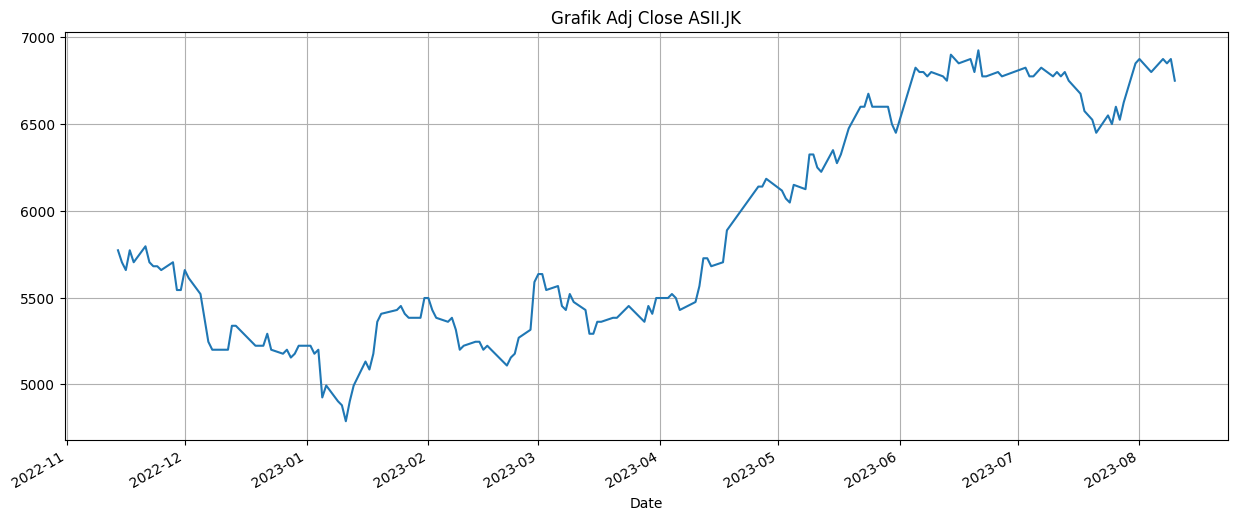

Max ASII.JK: 6925.0
Min ASII.JK: 4788.0


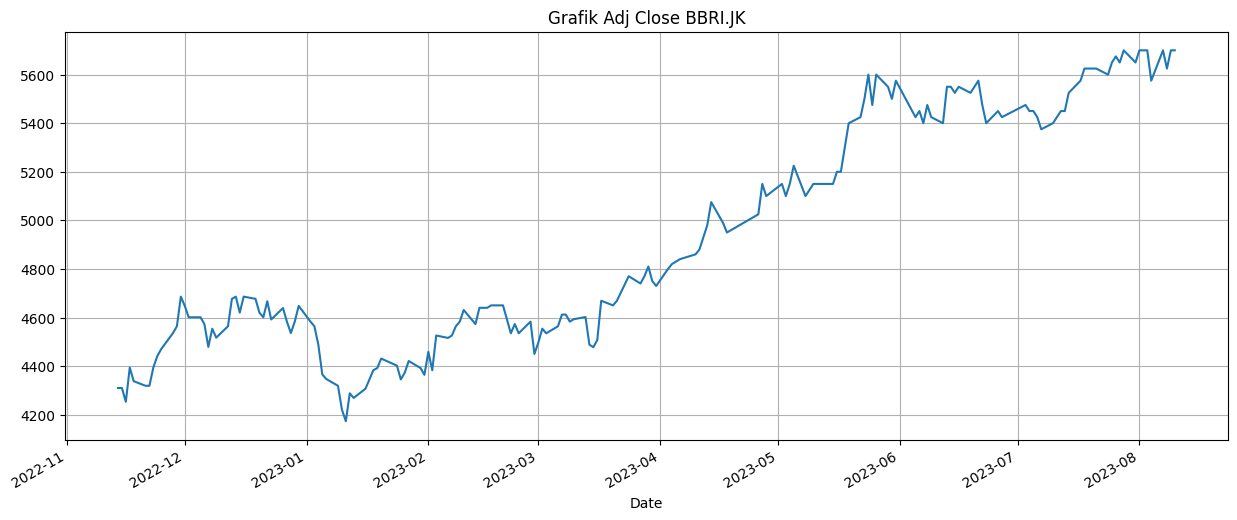

Max BBRI.JK: 5700.0
Min BBRI.JK: 4173.0


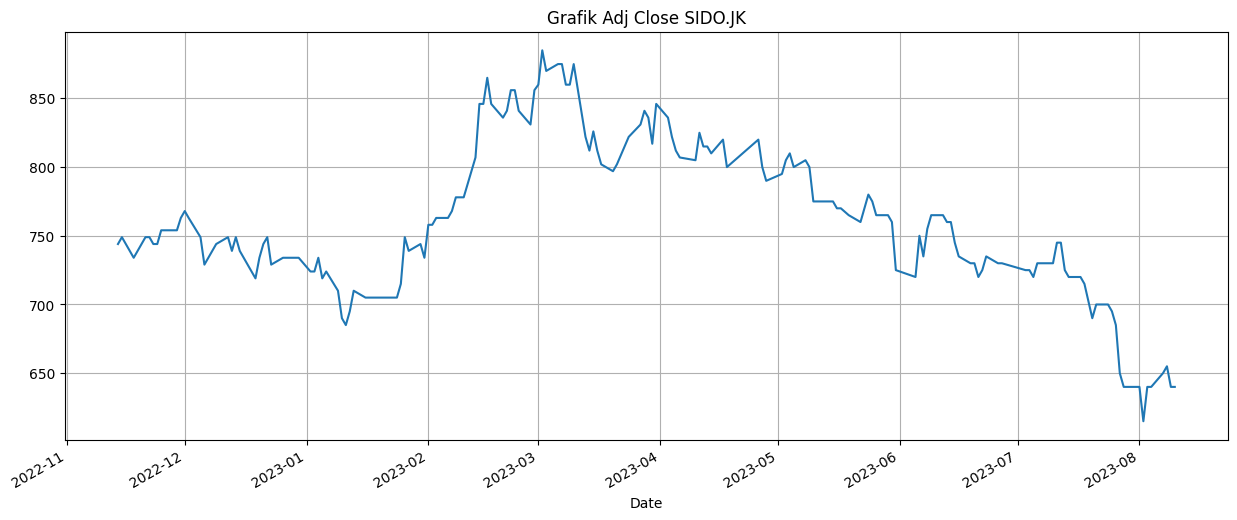

Max SIDO.JK: 885.0
Min SIDO.JK: 615.0


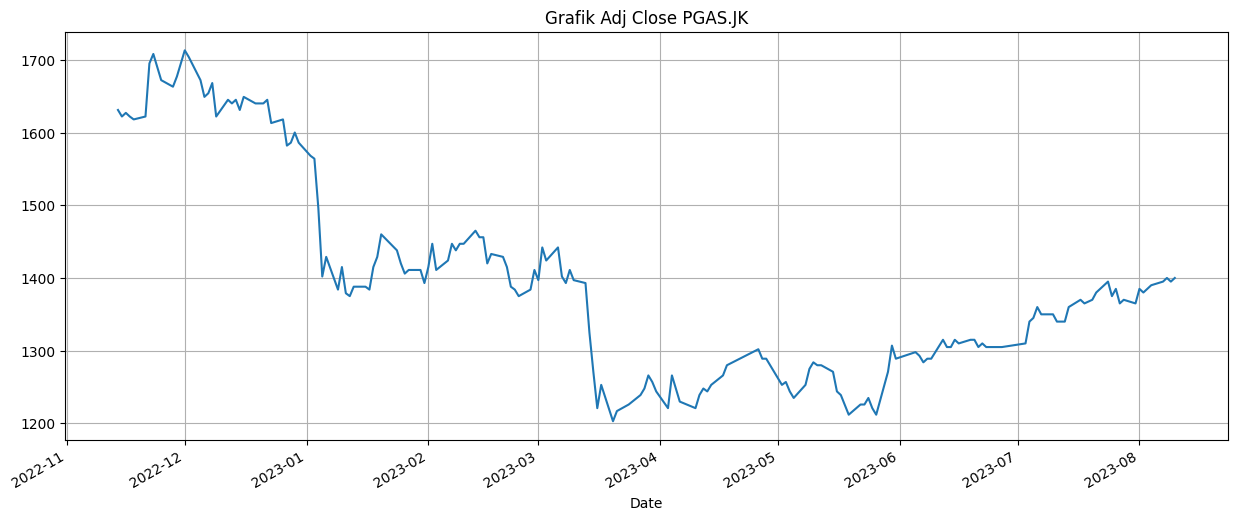

Max PGAS.JK: 1713.0
Min PGAS.JK: 1203.0


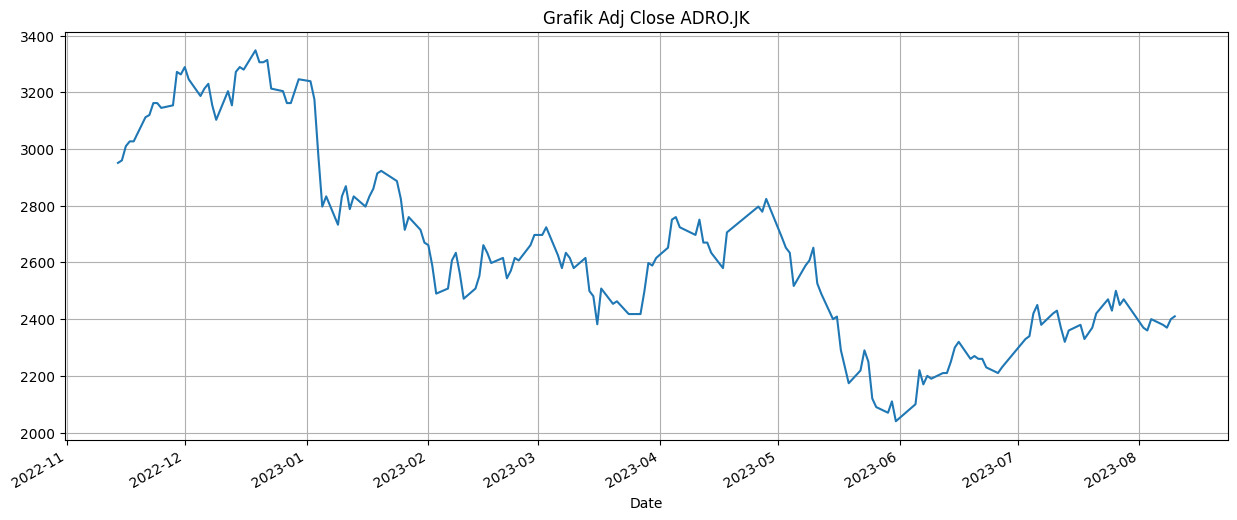

Max ADRO.JK: 3348.0
Min ADRO.JK: 2040.0


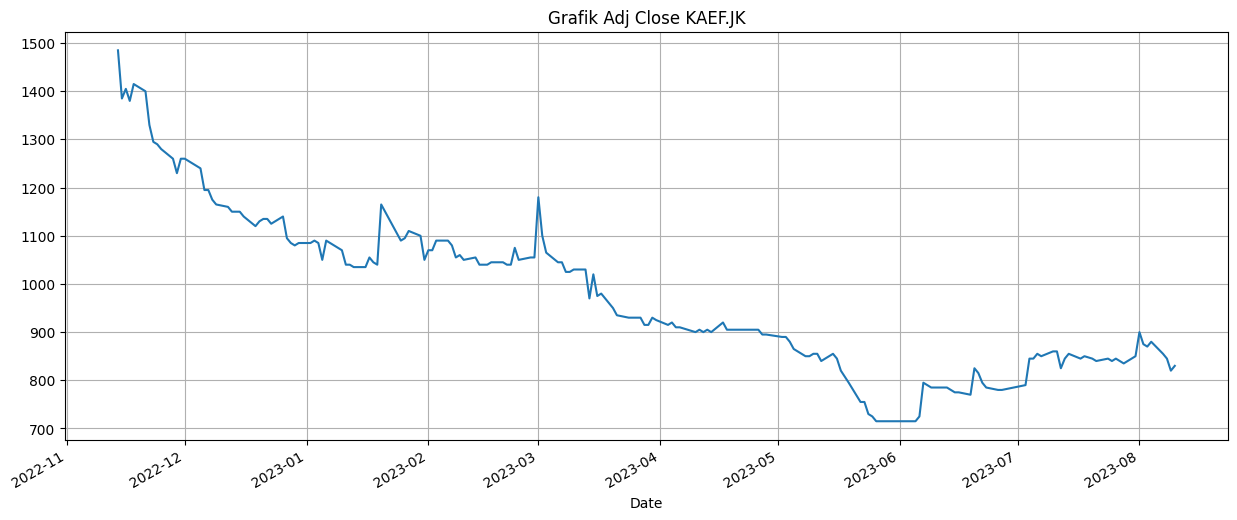

Max KAEF.JK: 1485.0
Min KAEF.JK: 715.0


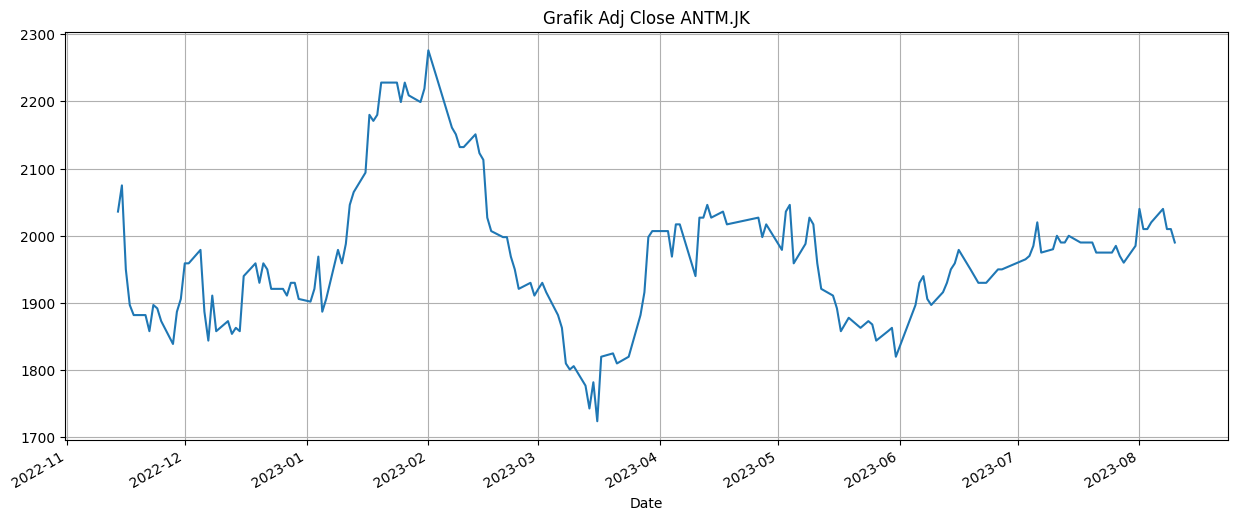

Max ANTM.JK: 2276.0
Min ANTM.JK: 1724.0


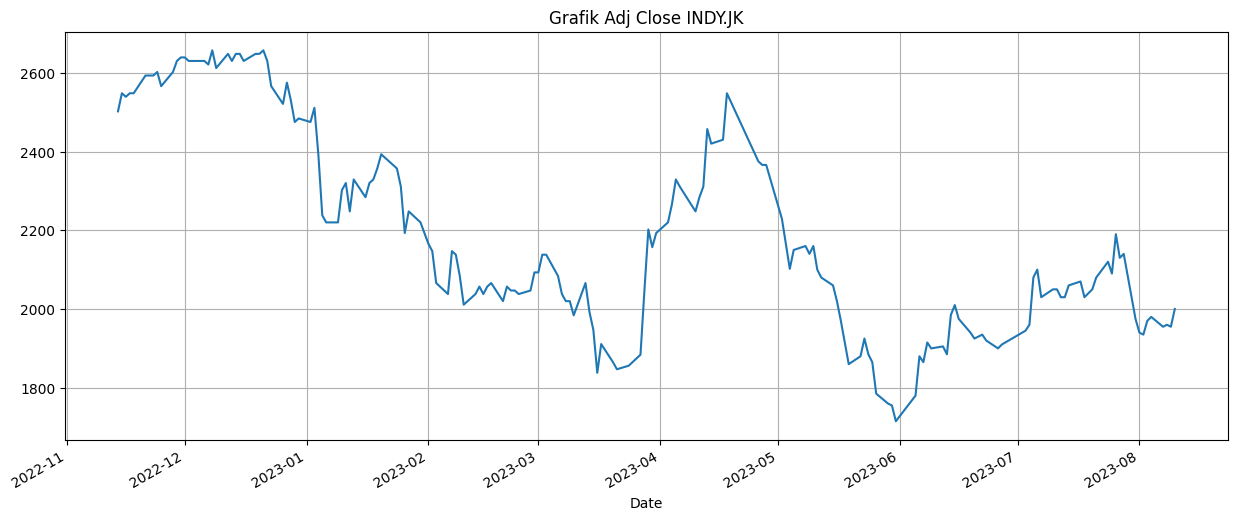

Max INDY.JK: 2657.0
Min INDY.JK: 1715.0


In [16]:
for symbol in symbols:
    plt.figure(figsize=(15, 6))
    stock_df['Adj Close'][symbol].plot()
    plt.title(f'Grafik Adj Close {symbol}')
    plt.grid()
    plt.show()
    print(f'Max {symbol}:',stock_df['Adj Close'][symbol].max())
    print(f'Min {symbol}:',stock_df['Adj Close'][symbol].min())

### persentase perubahan harga per hari tiap saham

untuk melihat perbedaan harga saham tiap hari

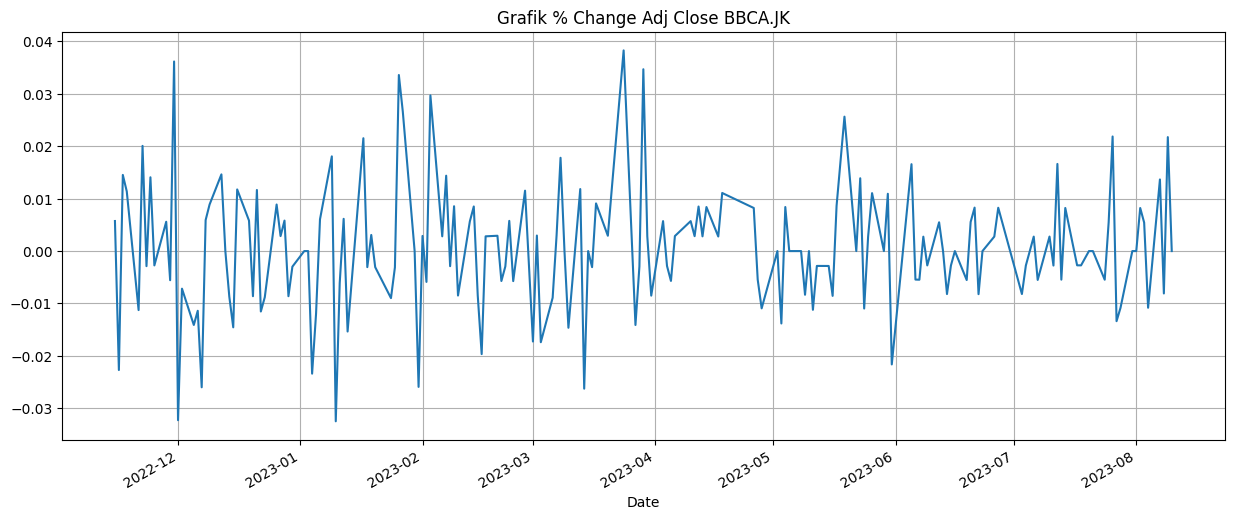

% Max Change BBCA.JK : 3.8%
% Min Change BBCA.JK : -3.2%


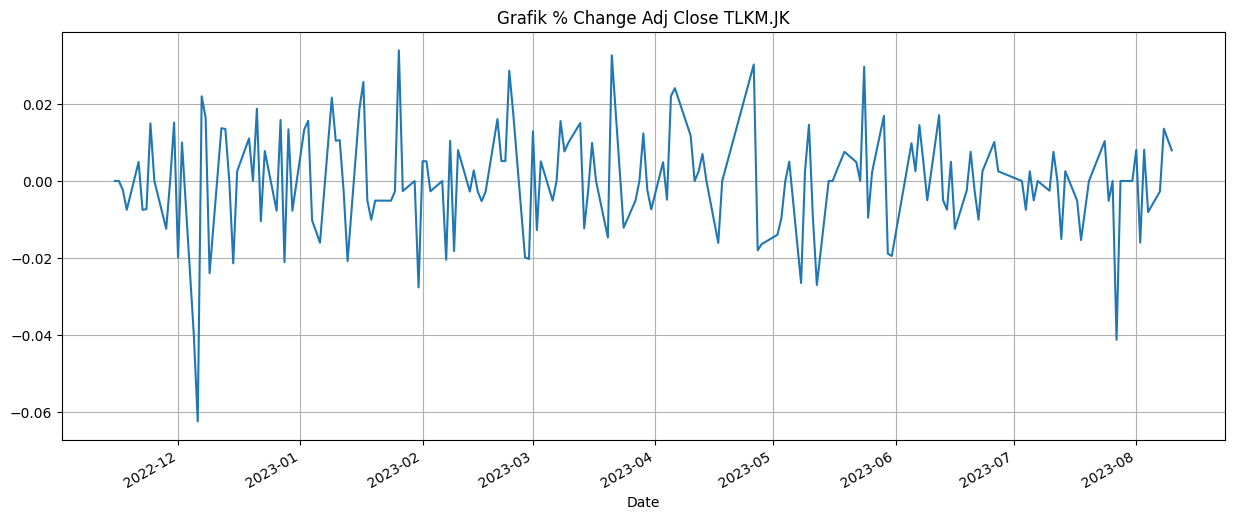

% Max Change TLKM.JK : 3.4000000000000004%
% Min Change TLKM.JK : -6.2%


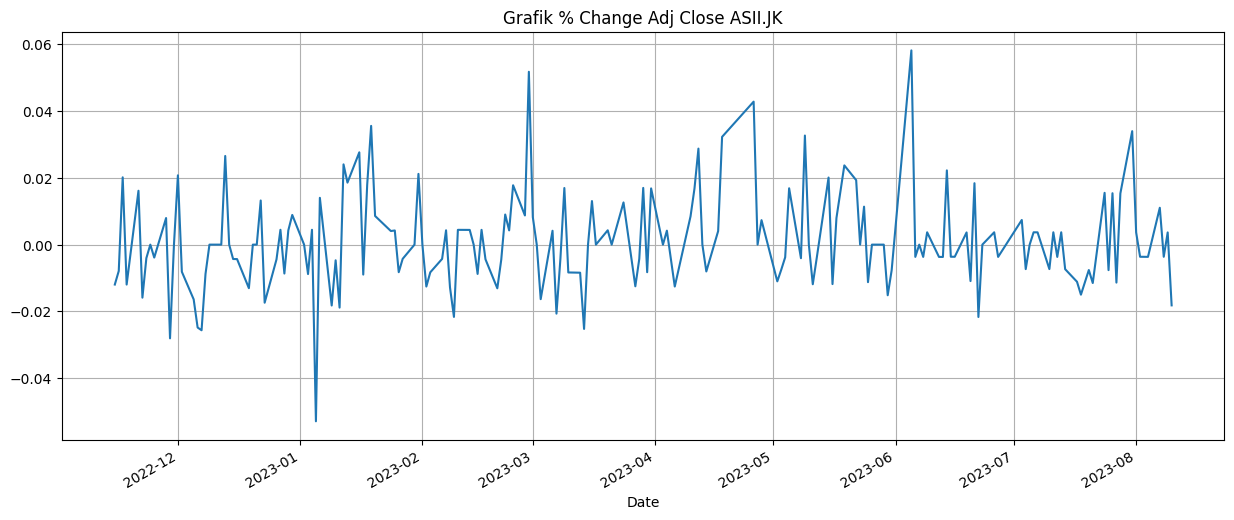

% Max Change ASII.JK : 5.800000000000001%
% Min Change ASII.JK : -5.3%


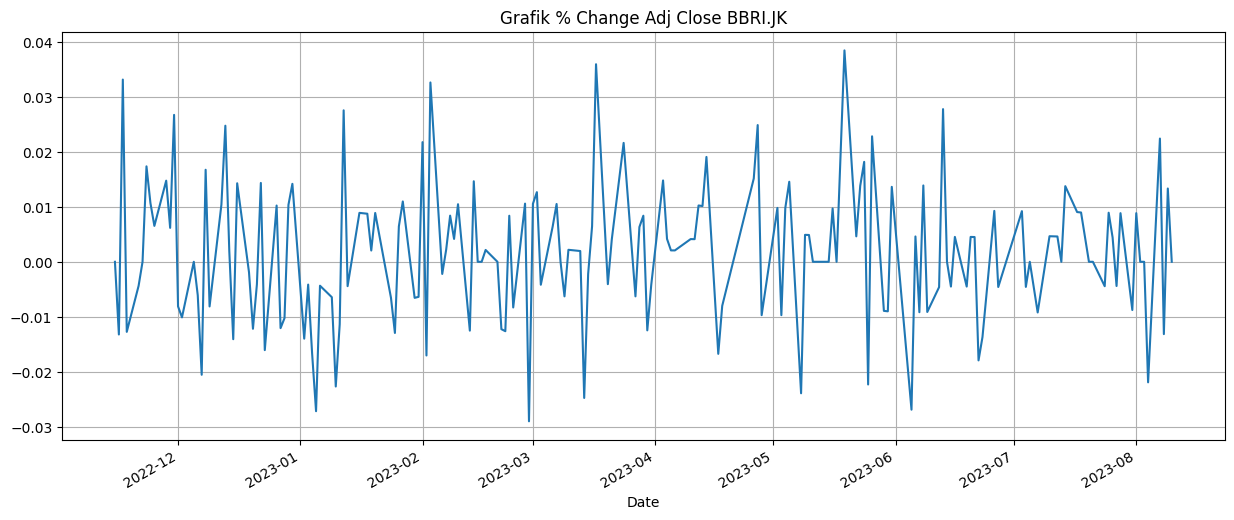

% Max Change BBRI.JK : 3.8%
% Min Change BBRI.JK : -2.9000000000000004%


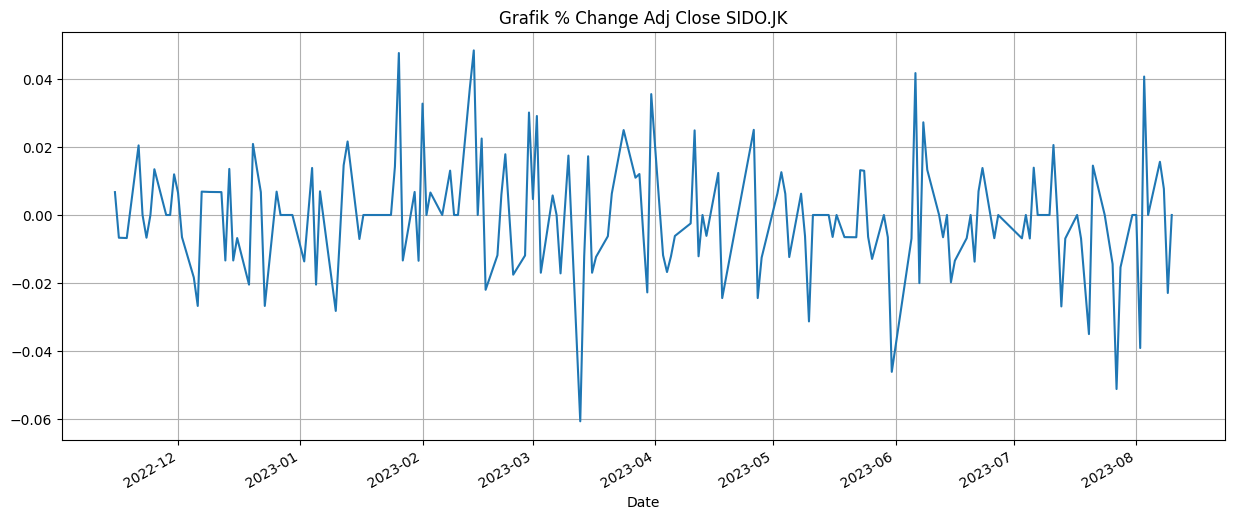

% Max Change SIDO.JK : 4.8%
% Min Change SIDO.JK : -6.1%


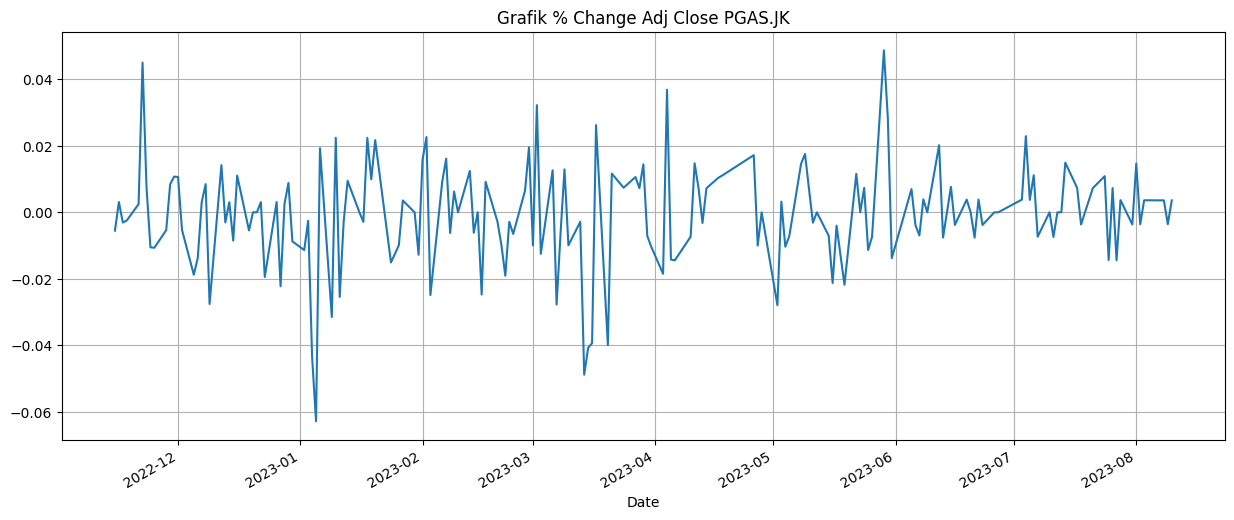

% Max Change PGAS.JK : 4.9%
% Min Change PGAS.JK : -6.3%


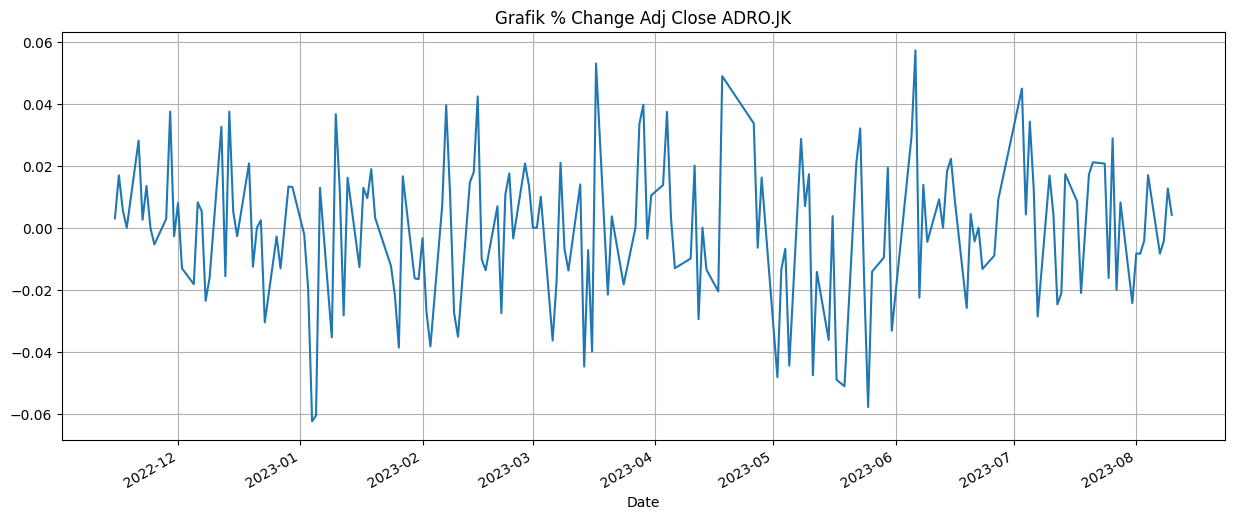

% Max Change ADRO.JK : 5.7%
% Min Change ADRO.JK : -6.2%


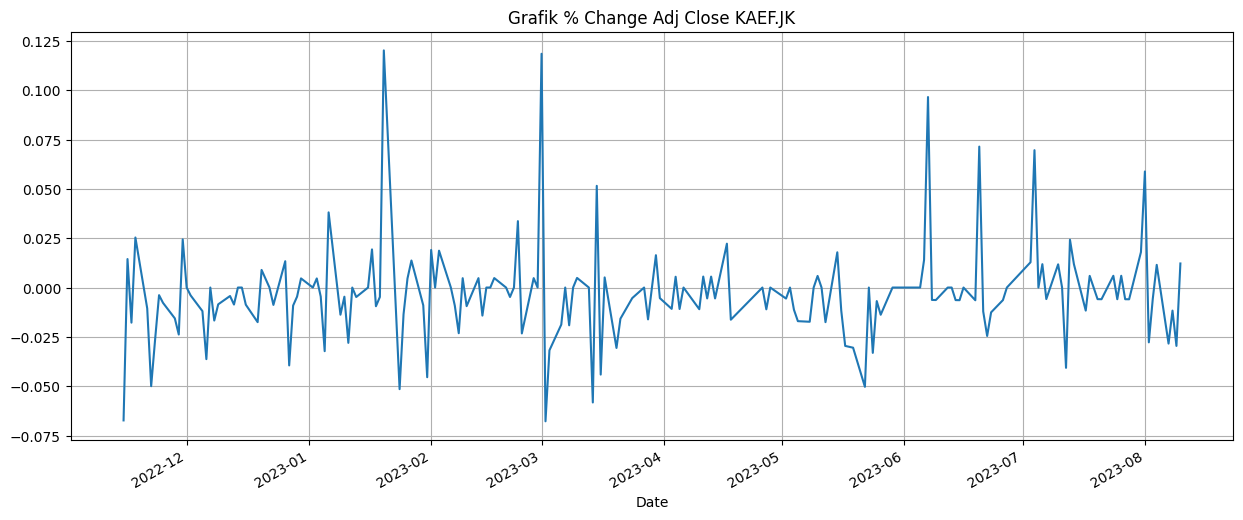

% Max Change KAEF.JK : 12.0%
% Min Change KAEF.JK : -6.800000000000001%


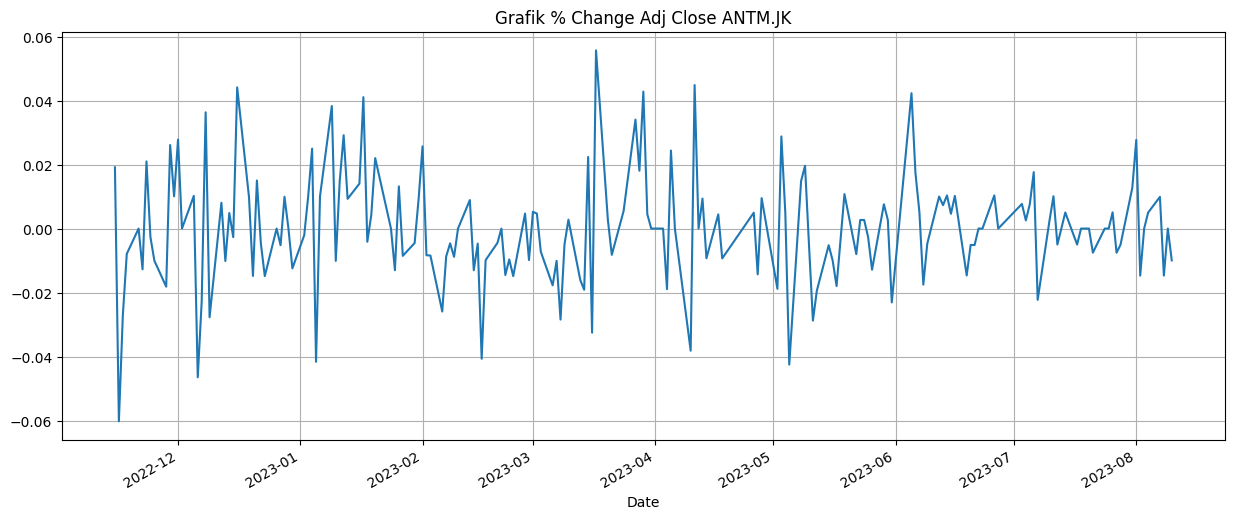

% Max Change ANTM.JK : 5.6000000000000005%
% Min Change ANTM.JK : -6.0%


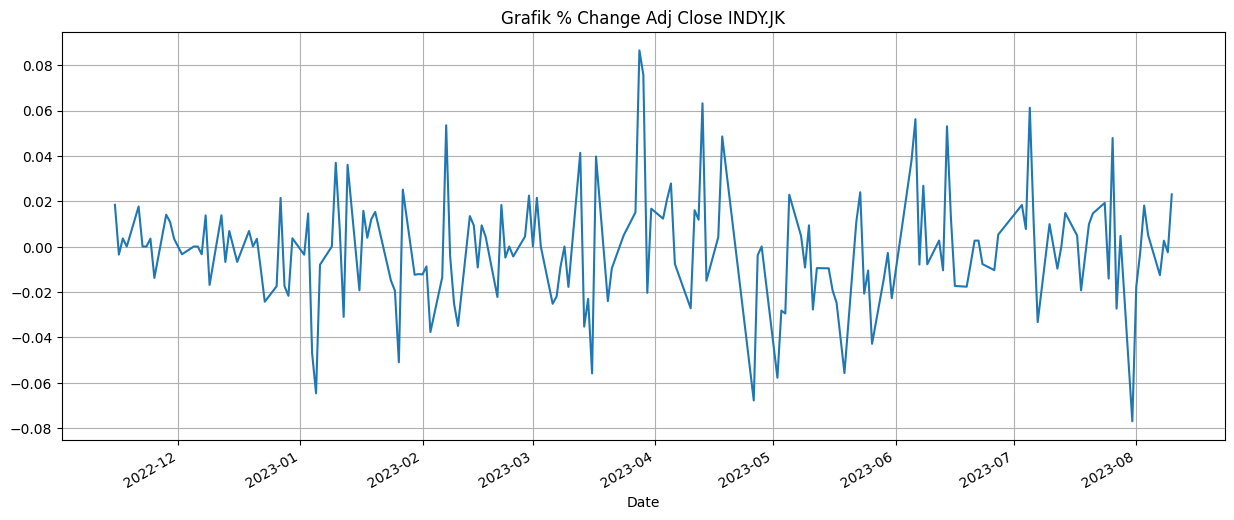

% Max Change INDY.JK : 8.7%
% Min Change INDY.JK : -7.7%


In [79]:
for symbol in symbols:
    plt.figure(figsize=(15, 6))
    stock_df['Adj Close'][symbol].pct_change().plot()
    plt.title(f'Grafik % Change Adj Close {symbol}')
    plt.grid()
    plt.show()
    print(f'% Max Change {symbol} : {(stock_df["Adj Close"][symbol].pct_change().max().round(3))*100}%')
    print(f'% Min Change {symbol} : {(stock_df["Adj Close"][symbol].pct_change().min().round(3))*100}%')


### pivot points, support dan resistance

- Pivot Point:
    Pivot point adalah harga rata-rata dari harga tertinggi (high), harga terendah (low), dan harga penutupan (close) dari sesi perdagangan sebelumnya. Pivot point digunakan sebagai referensi utama untuk mengidentifikasi tingkat support dan resistance.

- Support (Dukungan):
    Tingkat support adalah harga di bawah pivot point di mana tekanan jual cenderung berkurang dan harga cenderung berbalik naik. Ini adalah level di mana banyak trader percaya harga akan menemui permintaan yang cukup besar untuk mendorong harga kembali naik. Jika harga jatuh ke tingkat support, ada potensi harga akan memantul naik.

- Resistance (Tahanan):
    Tingkat resistance adalah harga di atas pivot point di mana tekanan beli cenderung berkurang dan harga cenderung berbalik turun. Ini adalah level di mana banyak trader percaya harga akan menemui penawaran yang cukup besar untuk mendorong harga kembali turun. Jika harga mencapai tingkat resistance, ada potensi harga akan berbalik turun.

In [10]:
# Menghitung pivot points, support, dan resistance secara manual
high = stock_df['High']
low = stock_df['Low']
close = stock_df['Close']

pivot_point = ((high + low + close) / 3).round(2)
support = ((2 * pivot_point) - high).round(2)
resistance = ((2 * pivot_point) - low).round(2)

print("Pivot Point:")
pivot_point.tail(10)


Pivot Point:


,ADRO.JK,ANTM.JK,ASII.JK,BBCA.JK,BBRI.JK,INDY.JK,KAEF.JK,PGAS.JK,SIDO.JK,TLKM.JK
Date,,,,,,,,,,
2023-07-28,2453.33,1963.33,6575.00,9158.33,5675.00,2133.33,836.67,1366.67,641.67,3720.00
2023-07-31,2420.00,1978.33,6841.67,9141.67,5666.67,2015.00,848.33,1371.67,645.00,3713.33
2023-08-01,2390.00,2030.00,6858.33,9133.33,5700.00,1951.67,890.00,1381.67,645.00,3743.33
2023-08-02,2363.33,2016.67,6825.00,9175.00,5691.67,1941.67,883.33,1380.00,623.33,3703.33
2023-08-03,2366.67,2006.67,6833.33,9233.33,5700.00,1963.33,873.33,1381.67,635.00,3716.67
2023-08-04,2410.00,2020.00,6800.00,9183.33,5625.00,1990.00,875.00,1395.00,643.33,3703.33
2023-08-07,2380.00,2036.67,6841.67,9233.33,5666.67,1965.00,865.00,1390.00,648.33,3693.33
2023-08-08,2386.67,2020.00,6858.33,9233.33,5658.33,1966.67,846.67,1400.00,655.00,3723.33
2023-08-09,2390.00,2006.67,6858.33,9350.00,5683.33,1961.67,831.67,1395.00,645.00,3770.00


In [11]:
print("Support:")
support.tail(10)

Support:


,ADRO.JK,ANTM.JK,ASII.JK,BBCA.JK,BBRI.JK,INDY.JK,KAEF.JK,PGAS.JK,SIDO.JK,TLKM.JK
Date,,,,,,,,,,
2023-07-28,2426.66,1951.66,6525.00,9091.66,5650.00,2106.66,828.34,1358.34,633.34,3690.00
2023-07-31,2370.00,1966.66,6733.34,9083.34,5633.34,1930.00,831.66,1358.34,630.00,3676.66
2023-08-01,2370.00,2000.00,6816.66,9091.66,5650.00,1928.34,865.00,1368.34,635.00,3706.66
2023-08-02,2346.66,1983.34,6800.00,9150.00,5658.34,1923.34,851.66,1370.00,601.66,3666.66
2023-08-03,2343.34,1993.34,6766.66,9166.66,5650.00,1941.66,861.66,1373.34,620.00,3673.34
2023-08-04,2380.00,2000.00,6750.00,9091.66,5525.00,1970.00,865.00,1380.00,631.66,3676.66
2023-08-07,2360.00,2023.34,6783.34,9191.66,5608.34,1945.00,845.00,1385.00,641.66,3666.66
2023-08-08,2353.34,1990.00,6816.66,9166.66,5566.66,1948.34,828.34,1395.00,650.00,3686.66
2023-08-09,2380.00,1993.34,6841.66,9300.00,5641.66,1948.34,808.34,1385.00,635.00,3740.00


In [12]:
print("Resistance:")
resistance.tail(10)

Resistance:


,ADRO.JK,ANTM.JK,ASII.JK,BBCA.JK,BBRI.JK,INDY.JK,KAEF.JK,PGAS.JK,SIDO.JK,TLKM.JK
Date,,,,,,,,,,
2023-07-28,2496.66,1971.66,6675.00,9191.66,5725.00,2166.66,843.34,1378.34,648.34,3750.00
2023-07-31,2460.00,1996.66,6958.34,9183.34,5683.34,2060.00,866.66,1378.34,655.00,3756.66
2023-08-01,2410.00,2070.00,6916.66,9166.66,5750.00,1963.34,925.00,1398.34,650.00,3786.66
2023-08-02,2386.66,2043.34,6875.00,9225.00,5733.34,1953.34,906.66,1390.00,636.66,3726.66
2023-08-03,2383.34,2023.34,6891.66,9316.66,5750.00,1991.66,881.66,1393.34,655.00,3763.34
2023-08-04,2430.00,2040.00,6850.00,9241.66,5675.00,2000.00,890.00,1405.00,651.66,3716.66
2023-08-07,2400.00,2053.34,6933.34,9316.66,5758.34,1975.00,875.00,1400.00,656.66,3706.66
2023-08-08,2403.34,2040.00,6891.66,9266.66,5716.66,1978.34,863.34,1405.00,660.00,3766.66
2023-08-09,2410.00,2023.34,6891.66,9450.00,5741.66,1968.34,843.34,1405.00,650.00,3800.00


In [ ]:
'''pivot_point.to_csv('pivot_data.csv', index=True,header=True)
support.to_csv('support_data.csv', index=True,header=True) 
resistance.to_csv('resistance_data.csv', index=True,header=True)  '''

### ADX

ADX adalah indikator yang mengukur kekuatan tren secara keseluruhan tanpa memperdulikan arahnya. ADX dihitung berdasarkan perbedaan antara +DI dan -DI, serta dibagi dengan jumlah kedua indikator tersebut. ADX bernilai antara 0 hingga 100. Nilai rendah (di bawah 20) menunjukkan tren lemah atau pasar mendatar, sedangkan nilai tinggi (di atas 40) menunjukkan tren yang kuat.

In [4]:
# Menghitung DMI menggunakan ta library
adx_values = {}
for symbol in symbols:
    adx = ta.trend.ADXIndicator(high=stock_data['High'][symbol], low=stock_data['Low'][symbol], close=stock_data['Close'][symbol], window=14).adx()
    adx_values[symbol] = adx.round(2)

# Menggabungkan hasil ADX ke dalam DataFrame
adx_df = pd.DataFrame(adx_values)

adx_df.tail(10)

c:\Users\user\anaconda3\envs\tensorCUDA\lib\site-packages\ta\trend.py:780: RuntimeWarning: invalid value encountered in scalar divide
  dip[idx] = 100 * (self._dip[idx] / value)
c:\Users\user\anaconda3\envs\tensorCUDA\lib\site-packages\ta\trend.py:785: RuntimeWarning: invalid value encountered in scalar divide
  din[idx] = 100 * (self._din[idx] / value)


,BBCA.JK,TLKM.JK,ASII.JK,BBRI.JK,SIDO.JK,PGAS.JK,ADRO.JK,KAEF.JK,ANTM.JK,INDY.JK
Date,,,,,,,,,,
2023-07-28,23.09,25.19,23.28,31.27,37.91,18.24,14.97,34.86,16.38,23.42
2023-07-31,22.62,27.12,23.68,32.04,39.14,18.30,13.91,34.44,16.20,22.09
2023-08-01,22.18,28.15,24.05,33.18,40.28,18.76,13.07,35.33,17.89,21.28
2023-08-02,22.07,29.30,24.08,34.25,42.04,19.19,12.76,36.16,19.46,20.66
2023-08-03,22.96,29.87,24.47,35.44,43.24,19.60,12.28,36.94,20.92,19.64
2023-08-04,23.36,30.39,24.51,34.89,43.90,20.78,11.82,37.33,22.70,18.27
2023-08-07,23.72,31.00,24.93,34.38,44.52,21.50,11.07,37.37,24.54,17.41
2023-08-08,24.31,30.50,25.31,34.19,44.62,22.55,10.52,35.96,25.22,16.60
2023-08-09,25.72,29.13,25.67,34.02,45.04,22.78,10.02,34.14,25.38,15.85


menyimpan hasil perhitngan ADX kedalam file

In [5]:
#adx_df.to_csv('adx_data.csv', index=True, header=True)

### Volatilitas

Volatilitas adalah ukuran sejauh mana harga aset, seperti stock_df, berfluktuasi dari waktu ke waktu. Volatilitas mengindikasikan tingkat risiko atau ketidakpastian dalam pergerakan harga. Dalam konteks pasar stock_df, volatilitas tinggi menunjukkan bahwa harga stock_df bergerak dengan cepat dan dalam jangkauan yang lebih luas, sedangkan volatilitas rendah menunjukkan gerakan harga yang lebih stabil

In [129]:
close_prices = stock_data['Adj Close']
daily_returns = close_prices.pct_change()
volatilitas = (np.std(daily_returns)).round(4)*100
volatilitas

ADRO.JK    2.31
ANTM.JK    1.77
ASII.JK    1.46
BBCA.JK    1.20
BBRI.JK    1.26
INDY.JK    2.48
KAEF.JK    2.50
PGAS.JK    1.56
SIDO.JK    1.67
TLKM.JK    1.39
dtype: float64

### Value at Risk

Value at Risk (VaR) adalah metrik yang digunakan untuk mengukur risiko potensial dari suatu investasi atau portofolio investasi dalam suatu periode waktu tertentu pada tingkat kepercayaan tertentu. VaR menggambarkan kerugian maksimum yang mungkin terjadi dengan tingkat kepercayaan tertentu (misalnya, 95% atau 99%). Dengan kata lain, VaR memberi tahu Anda berapa banyak Anda bisa kehilangan dalam suatu investasi dengan tingkat kepercayaan tertentu dalam periode waktu tertentu.

In [23]:
confidence_level = 0.95
var = stats.norm.ppf(1 - confidence_level, loc=np.mean(daily_returns, axis=0), scale=volatilitas)
for i in range(len(symbols)):
    print(f'{symbols[i]} : {var[i].round(2)}')

BBCA.JK : -3.95
TLKM.JK : -2.93
ASII.JK : -2.53
BBRI.JK : -1.94
SIDO.JK : -2.12
PGAS.JK : -4.16
ADRO.JK : -4.12
KAEF.JK : -2.73
ANTM.JK : -2.76
INDY.JK : -2.29


### Relative Strength Index

RSI (Relative Strength Index) adalah indikator momentum dengan skala 0-100 yang digunakan dalam analisis teknis untuk mengukur kecepatan dan perubahan arah pergerakan harga suatu aset keuangan, seperti saham atau mata uang. RSI dapat memberikan petunjuk apakah suatu aset keuangan sudah overbought (Nilai di atas 70, terlalu banyak dibeli) atau oversold (Nilai di bawah 30, terlalu banyak dijual), yang dapat mengindikasikan kemungkinan pembalikan tren harga.

In [6]:
rsi_df = pd.DataFrame()

# Loop melalui setiap saham
for symbol in symbols:
    rsi_indicator = ta.momentum.RSIIndicator(stock_data['Adj Close'][symbol])
    rsi = rsi_indicator.rsi()
    rsi_df[symbol] = rsi.round(4)

print("RSI DataFrame:")
rsi_df.tail(10)

RSI DataFrame:


,BBCA.JK,TLKM.JK,ASII.JK,BBRI.JK,SIDO.JK,PGAS.JK,ADRO.JK,KAEF.JK,ANTM.JK,INDY.JK
Date,,,,,,,,,,
2023-07-28,49.9878,27.2221,48.7816,67.3855,20.5421,58.7969,58.0993,51.8344,47.0487,60.1540
2023-07-31,49.9878,27.2221,59.7728,60.9583,20.5421,56.6552,52.4704,57.0775,54.4989,44.1238
2023-08-01,49.9878,32.7258,60.7799,64.5950,20.5421,62.5339,50.7069,69.1375,65.8745,41.5918
2023-08-02,54.7875,28.1420,59.1842,64.5950,16.6185,60.3309,48.9356,60.0521,57.4391,41.2279
2023-08-03,57.7019,33.1815,57.5569,64.5950,30.8438,61.7809,48.0322,58.3992,57.4391,44.8650
2023-08-04,50.6674,30.8514,55.9017,50.0405,30.8438,63.2283,51.8606,60.7274,59.4467,45.8953
2023-08-07,57.6221,30.0928,59.6507,59.7960,35.9157,64.6693,49.8819,52.7753,63.1867,43.6969
2023-08-08,52.8114,38.2663,57.8842,53.0966,38.3503,66.0999,48.8777,49.9573,54.9938,44.2719
2023-08-09,61.9372,43.9157,59.1858,58.1465,34.1578,63.3379,51.9996,43.6782,54.9938,43.7903


menyimpan hasil rsi kedalam csv

In [7]:
#rsi_df.to_csv('rsi_data.csv', index=True,header=True)

## Data Analysis

melihat statistikal deskriptif dari masing masing kolom

In [28]:
stock_df.describe()

Adj Close                                                      \
           ADRO.JK      ANTM.JK      ASII.JK      BBCA.JK      BBRI.JK   
count   177.000000   177.000000   177.000000   177.000000   177.000000   
mean   2653.909605  1969.389831  5859.988701  8719.779661  4909.305085   
std     335.111248   105.249760   649.503534   366.450328   470.138806   
min    2040.000000  1724.000000  4788.000000  7892.000000  4173.000000   
25%    2400.000000  1902.000000  5315.000000  8407.000000  4536.000000   
50%    2616.000000  1959.000000  5613.000000  8726.000000  4686.000000   
75%    2833.000000  2017.000000  6600.000000  9050.000000  5425.000000   
max    3348.000000  2276.000000  6925.000000  9400.000000  5700.000000   

                                                                       ...  \
           INDY.JK      KAEF.JK      PGAS.JK     SIDO.JK      TLKM.JK  ...   
count   177.000000   177.000000   177.000000  177.000000   177.000000  ...   
mean   2187.610169   983.022599  1401.581921  759.672316  3823.661017  ...   
std     256.004706   166.743678   141.128549   56.165087   157.627143  ...   
min    1715.000000   715.000000  1203.000000  615.000000  3455.000000  ...   
25%    1993.000000   845.000000  1289.000000  729.000000  3695.000000  ...   
50%    2120.000000   970.000000  1384.000000  749.000000  3838.000000  ...   
75%    2366.000000  1085.000000  1447.000000  802.000000  3950.000000  ...   
max    2657.000000  1485.000000  1713.000000  885.000000  4222.000000  ...   

             Volume                                                          \
            ADRO.JK       ANTM.JK       ASII.JK       BBCA.JK       BBRI.JK   
count  1.770000e+02  1.770000e+02  1.770000e+02  1.770000e+02  1.770000e+02   
mean   6.840213e+07  6.299012e+07  4.966673e+07  8.555376e+07  1.444760e+08   
std    3.942239e+07  3.885932e+07  3.401739e+07  7.475195e+07  9.265735e+07   
min    1.890820e+07  1.174220e+07  1.206880e+07  1.065390e+07  4.358110e+07   
25%    4.229750e+07  3.562200e+07  2.942530e+07  5.172650e+07  8.991880e+07   
50%    5.996500e+07  5.521960e+07  3.754580e+07  7.267980e+07  1.209952e+08   
75%    8.266510e+07  7.655730e+07  6.158180e+07  9.714690e+07  1.778611e+08   
max    2.254802e+08  2.425827e+08  2.002520e+08  7.228279e+08  8.984537e+08   

                                                                             
            INDY.JK       KAEF.JK       PGAS.JK       SIDO.JK       TLKM.JK  
count  1.770000e+02  1.770000e+02  1.770000e+02  1.770000e+02  1.770000e+02  
mean   1.088351e+07  1.034101e+06  4.540875e+07  2.361989e+07  1.074424e+08  
std    8.477529e+06  2.699044e+06  2.833761e+07  2.164228e+07  1.028994e+08  
min    2.079300e+06  1.245000e+05  7.017500e+06  2.485100e+06  7.959900e+06  
25%    5.439500e+06  3.337000e+05  2.658900e+07  1.239210e+07  6.502540e+07  
50%    8.946200e+06  5.068000e+05  3.967830e+07  1.762120e+07  8.539180e+07  
75%    1.320610e+07  9.294000e+05  5.373410e+07  2.733430e+07  1.159079e+08  
max    6.473050e+07  3.264700e+07  2.210075e+08  1.865326e+08  1.155861e+09  

[8 rows x 60 columns]

melihat lebih detail pada kolom adj close sebagai acuan

In [29]:
stock_df['Adj Close'].describe().round(2)

,ADRO.JK,ANTM.JK,ASII.JK,BBCA.JK,BBRI.JK,INDY.JK,KAEF.JK,PGAS.JK,SIDO.JK,TLKM.JK
count,177.00,177.00,177.00,177.00,177.00,177.00,177.00,177.00,177.00,177.00
mean,2653.91,1969.39,5859.99,8719.78,4909.31,2187.61,983.02,1401.58,759.67,3823.66
std,335.11,105.25,649.50,366.45,470.14,256.00,166.74,141.13,56.17,157.63
min,2040.00,1724.00,4788.00,7892.00,4173.00,1715.00,715.00,1203.00,615.00,3455.00
25%,2400.00,1902.00,5315.00,8407.00,4536.00,1993.00,845.00,1289.00,729.00,3695.00
50%,2616.00,1959.00,5613.00,8726.00,4686.00,2120.00,970.00,1384.00,749.00,3838.00
75%,2833.00,2017.00,6600.00,9050.00,5425.00,2366.00,1085.00,1447.00,802.00,3950.00
max,3348.00,2276.00,6925.00,9400.00,5700.00,2657.00,1485.00,1713.00,885.00,4222.00


In [30]:
stock_column = ['Close','High','Low','Open','Volume']

melihat informasi data

In [31]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 177 entries, 2022-11-14 to 2023-08-10
Data columns (total 60 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   (Adj Close, ADRO.JK)  177 non-null    float64
 1   (Adj Close, ANTM.JK)  177 non-null    float64
 2   (Adj Close, ASII.JK)  177 non-null    float64
 3   (Adj Close, BBCA.JK)  177 non-null    float64
 4   (Adj Close, BBRI.JK)  177 non-null    float64
 5   (Adj Close, INDY.JK)  177 non-null    float64
 6   (Adj Close, KAEF.JK)  177 non-null    float64
 7   (Adj Close, PGAS.JK)  177 non-null    float64
 8   (Adj Close, SIDO.JK)  177 non-null    float64
 9   (Adj Close, TLKM.JK)  177 non-null    float64
 10  (Close, ADRO.JK)      177 non-null    float64
 11  (Close, ANTM.JK)      177 non-null    float64
 12  (Close, ASII.JK)      177 non-null    float64
 13  (Close, BBCA.JK)      177 non-null    float64
 14  (Close, BBRI.JK)      177 non-null    float64
 15  (Clo

mengecek apakah data ada yang NUll atau Duplicated

In [32]:
print('{} of data is duplicated rows'.format(str(round(stock_df.duplicated().sum() / stock_df.shape[0] * 100,2))+'%'))
print('{} of data is NuLL'.format(str(round(stock_df.isna().sum().sum() / stock_df.shape[0] * 100,2))+'%'))

0.0% of data is duplicated rows
0.0% of data is NuLL


In [33]:
if stock_df.isna().sum().sum()!=0:
    df_null=pd.DataFrame(stock_df.isnull().sum(),columns=['Number Of Null'])
    df_null['Percentage']=df_null['Number Of Null']/stock_df.shape[0]*100
    df_null

Melihat harga saham yang outlier

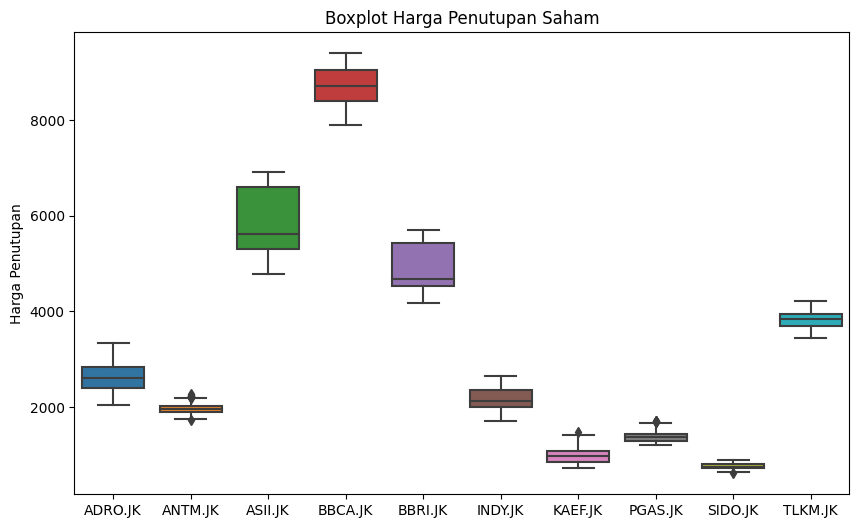

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat boxplot untuk setiap saham
plt.figure(figsize=(10, 6))
sns.boxplot(data=stock_df['Adj Close'])
plt.title('Boxplot Harga Penutupan Saham')
plt.ylabel('Harga Penutupan')
plt.show()


In [35]:
IQR = stock_df['Adj Close'].quantile(0.75) - stock_df['Adj Close'].quantile(0.25)
lower_bound = stock_df['Adj Close'].quantile(0.25) - 1.5 * IQR
upper_bound = stock_df['Adj Close'].quantile(0.75) + 1.5 * IQR

outliers_count = ((stock_df['Adj Close'] < lower_bound) | (stock_df['Adj Close'] > upper_bound)).sum()

print("Jumlah data outlier:")
outliers_count

Jumlah data outlier:


ADRO.JK     0
ANTM.JK    11
ASII.JK     0
BBCA.JK     0
BBRI.JK     0
INDY.JK     0
KAEF.JK     1
PGAS.JK     6
SIDO.JK     1
TLKM.JK     0
dtype: int64

saham yang outlier tidak terlalu banyak dan tidak terlalu menyimpang. karena sifat saham yang fluktuatif dan banyak faktor yang mempengaruhi maka tidak dilakukan normalisasi data. kolom Adj Close akan menjadi acuan untuk prediksi karena menggambarkan pergerakan saham yang representatif

# Feature Engineering

In [36]:
stock_df['Adj Close'].shape

(177, 10)

In [38]:
features = stock_df['Adj Close']
features

,ADRO.JK,ANTM.JK,ASII.JK,BBCA.JK,BBRI.JK,INDY.JK,KAEF.JK,PGAS.JK,SIDO.JK,TLKM.JK
Date,,,,,,,,,,
2022-11-14,2951.0,2036.0,5773.0,8545.0,4310.0,2502.0,1485.0,1631.0,744.0,3886.0
2022-11-15,2960.0,2075.0,5704.0,8594.0,4310.0,2548.0,1385.0,1622.0,749.0,3886.0
2022-11-16,3010.0,1950.0,5659.0,8399.0,4253.0,2539.0,1405.0,1627.0,744.0,3886.0
2022-11-17,3027.0,1897.0,5773.0,8521.0,4394.0,2548.0,1380.0,1622.0,739.0,3877.0
2022-11-18,3027.0,1882.0,5704.0,8618.0,4338.0,2548.0,1415.0,1618.0,734.0,3848.0
...,...,...,...,...,...,...,...,...,...,...
2023-08-04,2400.0,2020.0,6800.0,9150.0,5575.0,1980.0,880.0,1390.0,640.0,3690.0
2023-08-07,2380.0,2040.0,6875.0,9275.0,5700.0,1955.0,855.0,1395.0,650.0,3680.0
2023-08-08,2370.0,2010.0,6850.0,9200.0,5625.0,1960.0,845.0,1400.0,655.0,3730.0


membagi data berdasarkan rentang waktunya dengan ketentuan:
- inference untuk 1 bulan terakhir
- test untuk 1 bulan sebelumnya
- validation untuk 1 bulan sebelumnya
- train untuk 6 bulan sebelumnya

In [39]:
inference_start = features.index[-30]
test_start = inference_start - pd.DateOffset(months=1)
val_start = test_start - pd.DateOffset(months=1)
train_start = val_start - pd.DateOffset(months=6)

inference_data = features[inference_start:]
test_data = features[test_start:inference_start]
val_data = features[val_start:test_start]
train_data = features[train_start:val_start]

ilustrasi pembagian data pada saham BBCA

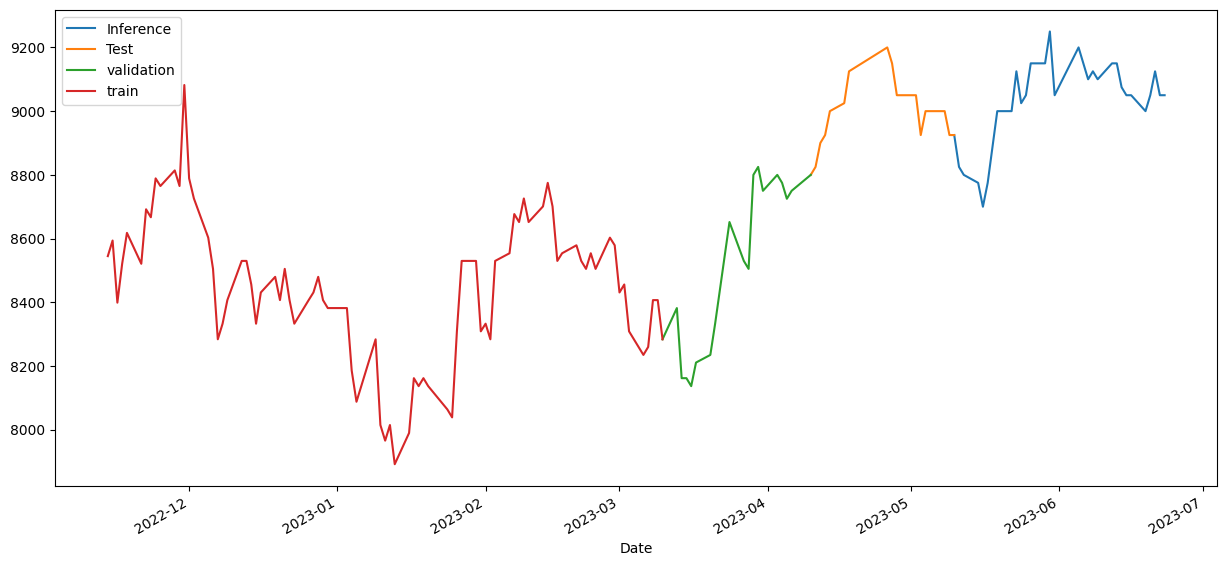

In [96]:
inference_data['BBCA.JK'].plot.line(figsize=(15, 7))
test_data['BBCA.JK'].plot.line(figsize=(15,7))
val_data['BBCA.JK'].plot.line(figsize=(15, 7))
train_data['BBCA.JK'].plot.line(figsize=(15,7))
plt.legend(['Inference', 'Test','validation','train'])

membuat target (y) dari adj close

In [40]:
y_col =[]

In [41]:
 #prediksi 1 bulan ke depan 
periods = 30
for symbol in symbols:
    features[f'y_{symbol}'] = features[symbol].shift(-periods)  # Shifting untuk prediksi
    y_col.append(f'y_{symbol}')

C:\Users\user\AppData\Local\Temp\ipykernel_13308\1393917187.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[f'y_{symbol}'] = features[symbol].shift(-periods)  # Shifting untuk prediksi
C:\Users\user\AppData\Local\Temp\ipykernel_13308\1393917187.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[f'y_{symbol}'] = features[symbol].shift(-periods)  # Shifting untuk prediksi
C:\Users\user\AppData\Local\Temp\ipykernel_13308\1393917187.py:4: SettingWithCopyWarning: 
A value is trying to be s

Menghapus baris yang memiliki nilai NaN

In [42]:
features.dropna(inplace=True) 

C:\Users\user\AppData\Local\Temp\ipykernel_13308\3284188361.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.dropna(inplace=True)  # Menghapus baris yang memiliki nilai NaN


membuat fitur (X) dan target (y) untuk diolah lebih lanjut

In [44]:
X = features[symbols]
y = features[y_col]

pembagian data untuk train, validation, test, dan inference

In [45]:
X_train = X[train_start:val_start]
y_train = y[train_start:val_start]

X_val = X[val_start:test_start]
y_val = y[val_start:test_start]

X_test = X[test_start:inference_start]
y_test = y[test_start:inference_start]

X_inf = X[inference_start:]


merubah data menjadi antara 0-1 dimana 0 adalah nilai minimal, 1 nilai maksimal dengan MinMaxScaler

In [46]:
scaler = MinMaxScaler()
X_train_fit = scaler.fit_transform(X_train)
X_val_fit = scaler.transform(X_val)
X_test_fit = scaler.transform(X_test)

Menggabungkan data dan merubah menjadi tensor agar bisa diolah dengan DNN

In [49]:
train_tf = tf.data.Dataset.from_tensor_slices((X_train_fit,y_train)).batch(256).shuffle(len(X_train_fit)).prefetch(tf.data.AUTOTUNE)#jgn pake repeat
test_tf = tf.data.Dataset.from_tensor_slices((X_test_fit,y_test)).batch(128)
val_tf = tf.data.Dataset.from_tensor_slices((X_val_fit,y_val)).batch(128)

# Base Model

## Model Definition

Membuat model dasar sebagai acuan

In [50]:
tf.keras.backend.clear_session()

In [51]:
input_layer = Input(shape=(X_train_fit.shape[1], 1))
x = LSTM(256, activation='relu', return_sequences=True)(input_layer)
x = Dropout(0.2)(x)
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
output_layer = Dense(y_train.shape[1])(x)
model_1 = Model(inputs=input_layer, outputs=output_layer)
model_1.summary()
model_1.compile(loss='huber_loss',
                         optimizer=Adam(learning_rate=0.01),
                         metrics='MSE')

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10, 1)]           0         
                                                                 
 lstm (LSTM)                 (None, 10, 256)           264192    
                                                                 
 dropout (Dropout)           (None, 10, 256)           0         
                                                                 
 flatten (Flatten)           (None, 2560)              0         
                                                                 
 dense (Dense)               (None, 64)                163904    
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 428746 (1.64 MB)
Trainable params: 428746 (1.64

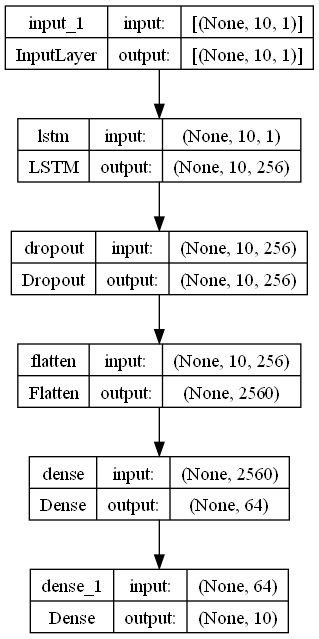

In [52]:
tf.keras.utils.plot_model(model_1, show_shapes=True)

1. input_layer : Ini adalah bagian pertama dari model fungsional dalam Keras. Ini adalah lapisan input yang mendefinisikan bentuk data masukan. 

2. lapisan LSTM (Long Short-Term Memory) dengan 256 unit neuron. `activation='relu'` menunjukkan bahwa fungsi aktivasi yang digunakan di dalam LSTM adalah fungsi ReLU (Rectified Linear Unit). `return_sequences=True` menunjukkan bahwa keluaran LSTM akan mengembalikan urutan sekuen penuh daripada hanya keluaran pada waktu terakhir.

3. lapisan Dropout yang mengurangi overfitting dengan mengatur proporsi neuron yang di-drop selama pelatihan. proporsi neuron yang akan di-drop, yaitu 20%.

4. lapisan Flatten yang mengubah tensor tiga dimensi menjadi vektor satu dimensi. Ini diperlukan sebelum melewatkan hasil LSTM ke lapisan Dense.

5. lapisan Dense dengan 64 unit neuron dan fungsi aktivasi ReLU.

6. Output dari model. `y_train.shape[1]` menunjukkan bahwa output akan memiliki dimensi yang sama dengan jumlah kolom pada `y_train`.

7. Kompilasi model dengan mengatur loss function (`huber_loss`), optimizer (`Adam` dengan learning rate 0.01), dan metrics (`MSE` untuk mengukur performa model).

## Model Training

menjalankan base model sebanyak 100 kali perulangan

In [54]:
history_seq = model_1.fit(train_tf,
                                   epochs=100,
                                   validation_data=(val_tf))

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 3239.3289 - MSE: 15716174.0000 - val_loss: 3364.3862 - val_MSE: 18108166.0000
Epoch 2/100
1/1 [==============================] - 0s 32ms/step - loss: 3238.9263 - MSE: 15713862.0000 - val_loss: 3361.5232 - val_MSE: 18091376.0000
Epoch 3/100
1/1 [==============================] - 0s 31ms/step - loss: 3236.5264 - MSE: 15700133.0000 - val_loss: 3212.6050 - val_MSE: 17243258.0000
Epoch 4/100
1/1 [==============================] - 0s 34ms/step - loss: 3151.1755 - MSE: 15220571.0000 - val_loss: 3463.4055 - val_MSE: 19425952.0000
Epoch 5/100
1/1 [==============================] - 0s 34ms/step - loss: 2476.0581 - MSE: 10354860.0000 - val_loss: 2927.9075 - val_MSE: 15339604.0000
Epoch 6/100
1/1 [==============================] - 0s 32ms/step - loss: 2977.1394 - MSE: 14121536.0000 - val_loss: 3157.2014 - val_MSE: 16665517.0000
Epoch 7/100
1/1 [==============================] - 0s 32ms/step - loss: 3117.0933 - MSE: 14891377.0000

## Model Evaluation

melihat performa model

In [55]:
history_seq_df = pd.DataFrame(history_seq.history)
history_seq_df

,loss,MSE,val_loss,val_MSE
0,3239.328857,1.571617e+07,3364.386230,1.810817e+07
1,3238.926270,1.571386e+07,3361.523193,1.809138e+07
2,3236.526367,1.570013e+07,3212.604980,1.724326e+07
3,3151.175537,1.522057e+07,3463.405518,1.942595e+07
4,2476.058105,1.035486e+07,2927.907471,1.533960e+07
...,...,...,...,...
95,499.566254,4.331001e+05,1228.054321,1.821247e+06
96,1191.553711,1.886580e+06,905.146057,1.020012e+06
97,892.861023,1.063872e+06,893.956116,1.636894e+06
98,795.624268,1.098590e+06,1317.115479,3.322030e+06


<Axes: >

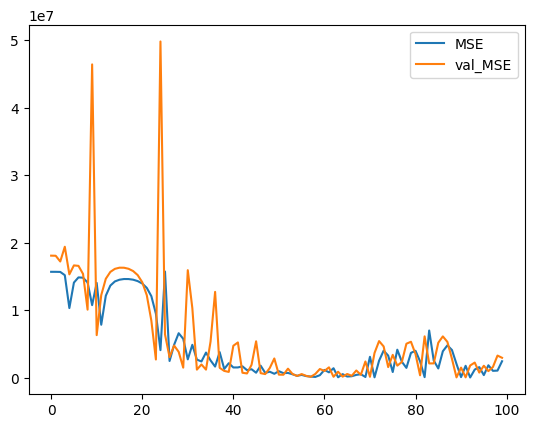

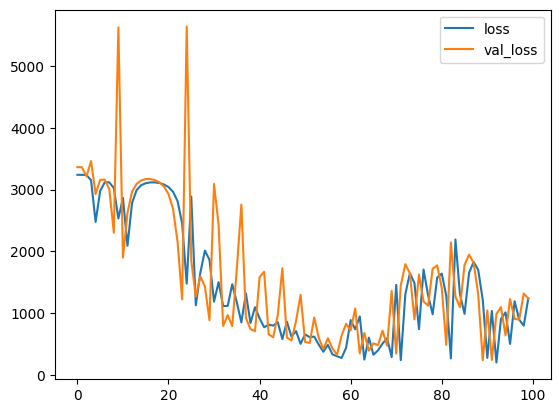

In [56]:
history_seq_df[['MSE', 'val_MSE']].plot()
history_seq_df[['loss', 'val_loss']].plot()

bisa dilihat bahwa model masih mengalami ketidak stabilan performa sehingga menghasilkan output yang kurang bagus. hasil terakhir dari model bisa dilihat dibawah

In [57]:
history_seq_df.min()

loss          199.453476
MSE         81850.851562
val_loss      235.875671
val_MSE     95001.437500
dtype: float64

In [58]:
y_pred = model_1.predict(X_test_fit)
y_pred.shape

1/1 [==============================] - 0s 154ms/step


(17, 10)

In [59]:
y_pred_train = model_1.predict(X_train_fit)
print('Train RMSE:',sqrt(mean_squared_error(y_train,y_pred_train)))
print('Test RMSE:',sqrt(mean_squared_error(y_test,y_pred)))

3/3 [==============================] - 0s 5ms/step
Train RMSE: 1483.756451916867
Test RMSE: 1735.3435100530755


baik train maupun test masih memiliki error yang besar dan ada perbedaan yang cukup jauh antara error train dan error test (+-300) yang cukup signifikan untuk harga saham sehingga model under fit

# Model Improvement

## Model Definition

Menambahkan layer untuk meningkatkan hasil performa model

In [60]:
tf.keras.backend.clear_session()

In [62]:
input_layer = Input(shape=(X_train.shape[1], 1))
x = Bidirectional(LSTM(256, activation='relu', return_sequences=True))(input_layer)
x = Bidirectional(GRU(128, activation='relu', return_sequences=True))(x)
x = LayerNormalization()(x)
x = Dropout(0.2)(x)
x = Flatten()(x)
x = Dense(32, activation='relu')(x)
x = Dense(16, activation='relu')(x)
output_layer = Dense(y_train.shape[1])(x)
model_2 = Model(inputs=input_layer, outputs=output_layer)
model_2.summary()
model_2.compile(loss='huber_loss',
                         optimizer=Adam(learning_rate=0.01),
                         metrics='MSE')#Nadam(learning_rate=0.001), Adam(learning_rate=0.001), RMSprop(learning_rate=0.001)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10, 1)]           0         
                                                                 
 bidirectional (Bidirection  (None, 10, 512)           528384    
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 10, 256)           493056    
 onal)                                                           
                                                                 
 layer_normalization (Layer  (None, 10, 256)           512       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 10, 256)           0         
                                                             

layer yang ditambah:

1. lapisan Bidirectional GRU (Gated Recurrent Unit). Lapisan ini mengandung 128 unit GRU dengan fungsi aktivasi ReLU. `return_sequences=True` menunjukkan bahwa keluaran dari lapisan GRU akan mengembalikan urutan sekuen penuh daripada hanya keluaran pada waktu terakhir. Lapisan Bidirectional memungkinkan model untuk memproses urutan masukan dalam kedua arah (masuk dan keluar) yang membantu dalam menangkap informasi kontekstual yang lebih baik.

2. lapisan Layer Normalization. Layer Normalization adalah teknik normalisasi yang bertujuan untuk mengurangi perubahan distribusi nilai input yang diteruskan ke lapisan berikutnya. Ini membantu dalam mengurangi masalah perubahan distribusi yang terjadi selama pelatihan jaringan saraf.

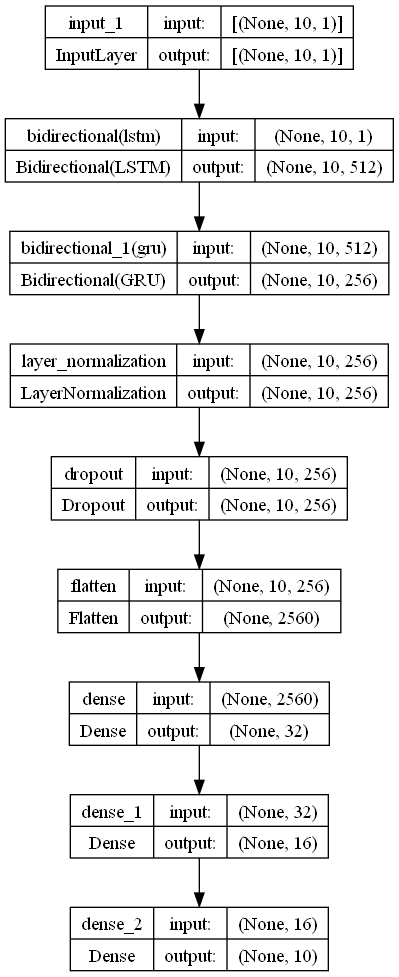

In [63]:
tf.keras.utils.plot_model(model_2, show_shapes=True)

## Model Training

In [ ]:
checkpoint_path = 'save file'
check_model = 'val_loss'
model_checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor=check_model,
    save_best_only=True,
    save_weights_only=False,
    verbose=1
)
reduce_lr = ReduceLROnPlateau(monitor=check_model,
                              factor=0.2,
                              patience=10,
                              verbose=1,
                              min_lr=1e-5)

Menggunakan callback untuk mengurangi learning rate, menyimpan model terbaik. lalu menjalankan model yang telah dibikin

In [64]:
history_seq_2 = model_2.fit(train_tf,
                                   epochs=100,
                                   batch_size=64,
                                   validation_data=(val_tf),
                                   callbacks=[model_checkpoint, reduce_lr])#callbacks=[model_checkpoint, reduce_lr, early_stop]

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 3239.3047 - MSE: 15715956.0000
Epoch 1: val_loss improved from inf to 3362.37329, saving model to save file
INFO:tensorflow:Assets written to: save file\assets


INFO:tensorflow:Assets written to: save file\assets


1/1 [==============================] - 11s 11s/step - loss: 3239.3047 - MSE: 15715956.0000 - val_loss: 3362.3733 - val_MSE: 18092516.0000 - lr: 0.0100
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 3236.9026 - MSE: 15698906.0000
Epoch 2: val_loss improved from 3362.37329 to 3353.84204, saving model to save file
INFO:tensorflow:Assets written to: save file\assets


INFO:tensorflow:Assets written to: save file\assets


1/1 [==============================] - 6s 6s/step - loss: 3236.9026 - MSE: 15698906.0000 - val_loss: 3353.8420 - val_MSE: 18039120.0000 - lr: 0.0100
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 3228.3005 - MSE: 15648104.0000
Epoch 3: val_loss improved from 3353.84204 to 3343.53394, saving model to save file
INFO:tensorflow:Assets written to: save file\assets


INFO:tensorflow:Assets written to: save file\assets


1/1 [==============================] - 6s 6s/step - loss: 3228.3005 - MSE: 15648104.0000 - val_loss: 3343.5339 - val_MSE: 17977486.0000 - lr: 0.0100
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 3218.4700 - MSE: 15592224.0000
Epoch 4: val_loss improved from 3343.53394 to 3340.81836, saving model to save file
INFO:tensorflow:Assets written to: save file\assets


INFO:tensorflow:Assets written to: save file\assets


1/1 [==============================] - 6s 6s/step - loss: 3218.4700 - MSE: 15592224.0000 - val_loss: 3340.8184 - val_MSE: 17961916.0000 - lr: 0.0100
Epoch 5/100
1/1 [==============================] - ETA: 0s - loss: 3214.9949 - MSE: 15572456.0000
Epoch 5: val_loss improved from 3340.81836 to 3323.58496, saving model to save file
INFO:tensorflow:Assets written to: save file\assets


INFO:tensorflow:Assets written to: save file\assets


1/1 [==============================] - 7s 7s/step - loss: 3214.9949 - MSE: 15572456.0000 - val_loss: 3323.5850 - val_MSE: 17857048.0000 - lr: 0.0100
Epoch 6/100
1/1 [==============================] - ETA: 0s - loss: 3197.8396 - MSE: 15472590.0000
Epoch 6: val_loss improved from 3323.58496 to 3298.81714, saving model to save file
INFO:tensorflow:Assets written to: save file\assets


INFO:tensorflow:Assets written to: save file\assets


1/1 [==============================] - 6s 6s/step - loss: 3197.8396 - MSE: 15472590.0000 - val_loss: 3298.8171 - val_MSE: 17705478.0000 - lr: 0.0100
Epoch 7/100
1/1 [==============================] - ETA: 0s - loss: 3172.2537 - MSE: 15323166.0000
Epoch 7: val_loss improved from 3298.81714 to 3256.51538, saving model to save file
INFO:tensorflow:Assets written to: save file\assets


INFO:tensorflow:Assets written to: save file\assets


1/1 [==============================] - 7s 7s/step - loss: 3172.2537 - MSE: 15323166.0000 - val_loss: 3256.5154 - val_MSE: 17448912.0000 - lr: 0.0100
Epoch 8/100
1/1 [==============================] - ETA: 0s - loss: 3130.6072 - MSE: 15081841.0000
Epoch 8: val_loss improved from 3256.51538 to 3213.19409, saving model to save file
INFO:tensorflow:Assets written to: save file\assets


INFO:tensorflow:Assets written to: save file\assets


1/1 [==============================] - 6s 6s/step - loss: 3130.6072 - MSE: 15081841.0000 - val_loss: 3213.1941 - val_MSE: 17186568.0000 - lr: 0.0100
Epoch 9/100
1/1 [==============================] - ETA: 0s - loss: 3085.4849 - MSE: 14821278.0000
Epoch 9: val_loss improved from 3213.19409 to 3155.11426, saving model to save file
INFO:tensorflow:Assets written to: save file\assets


INFO:tensorflow:Assets written to: save file\assets


1/1 [==============================] - 6s 6s/step - loss: 3085.4849 - MSE: 14821278.0000 - val_loss: 3155.1143 - val_MSE: 16839482.0000 - lr: 0.0100
Epoch 10/100
1/1 [==============================] - ETA: 0s - loss: 3028.1289 - MSE: 14494053.0000
Epoch 10: val_loss improved from 3155.11426 to 3082.00537, saving model to save file
INFO:tensorflow:Assets written to: save file\assets


INFO:tensorflow:Assets written to: save file\assets


1/1 [==============================] - 6s 6s/step - loss: 3028.1289 - MSE: 14494053.0000 - val_loss: 3082.0054 - val_MSE: 16410627.0000 - lr: 0.0100
Epoch 11/100
1/1 [==============================] - ETA: 0s - loss: 2956.5171 - MSE: 14093306.0000
Epoch 11: val_loss improved from 3082.00537 to 2992.93286, saving model to save file
INFO:tensorflow:Assets written to: save file\assets


INFO:tensorflow:Assets written to: save file\assets


1/1 [==============================] - 6s 6s/step - loss: 2956.5171 - MSE: 14093306.0000 - val_loss: 2992.9329 - val_MSE: 15900584.0000 - lr: 0.0100
Epoch 12/100
1/1 [==============================] - ETA: 0s - loss: 2867.6108 - MSE: 13608181.0000
Epoch 12: val_loss improved from 2992.93286 to 2882.93262, saving model to save file
INFO:tensorflow:Assets written to: save file\assets


INFO:tensorflow:Assets written to: save file\assets


1/1 [==============================] - 6s 6s/step - loss: 2867.6108 - MSE: 13608181.0000 - val_loss: 2882.9326 - val_MSE: 15290912.0000 - lr: 0.0100
Epoch 13/100
1/1 [==============================] - ETA: 0s - loss: 2755.6177 - MSE: 13017934.0000
Epoch 13: val_loss improved from 2882.93262 to 2749.05225, saving model to save file
INFO:tensorflow:Assets written to: save file\assets


INFO:tensorflow:Assets written to: save file\assets


1/1 [==============================] - 7s 7s/step - loss: 2755.6177 - MSE: 13017934.0000 - val_loss: 2749.0522 - val_MSE: 14580231.0000 - lr: 0.0100
Epoch 14/100
1/1 [==============================] - ETA: 0s - loss: 2620.6882 - MSE: 12338880.0000
Epoch 14: val_loss improved from 2749.05225 to 2597.45557, saving model to save file
INFO:tensorflow:Assets written to: save file\assets


INFO:tensorflow:Assets written to: save file\assets


1/1 [==============================] - 6s 6s/step - loss: 2620.6882 - MSE: 12338880.0000 - val_loss: 2597.4556 - val_MSE: 13772158.0000 - lr: 0.0100
Epoch 15/100
1/1 [==============================] - ETA: 0s - loss: 2467.8020 - MSE: 11572488.0000
Epoch 15: val_loss improved from 2597.45557 to 2459.19360, saving model to save file
INFO:tensorflow:Assets written to: save file\assets


INFO:tensorflow:Assets written to: save file\assets


1/1 [==============================] - 6s 6s/step - loss: 2467.8020 - MSE: 11572488.0000 - val_loss: 2459.1936 - val_MSE: 12899695.0000 - lr: 0.0100
Epoch 16/100
1/1 [==============================] - ETA: 0s - loss: 2318.1558 - MSE: 10744806.0000
Epoch 16: val_loss improved from 2459.19360 to 2356.76440, saving model to save file
INFO:tensorflow:Assets written to: save file\assets


INFO:tensorflow:Assets written to: save file\assets


1/1 [==============================] - 6s 6s/step - loss: 2318.1558 - MSE: 10744806.0000 - val_loss: 2356.7644 - val_MSE: 11924467.0000 - lr: 0.0100
Epoch 17/100
1/1 [==============================] - ETA: 0s - loss: 2173.6650 - MSE: 9843756.0000
Epoch 17: val_loss improved from 2356.76440 to 2243.01685, saving model to save file
INFO:tensorflow:Assets written to: save file\assets


INFO:tensorflow:Assets written to: save file\assets


1/1 [==============================] - 6s 6s/step - loss: 2173.6650 - MSE: 9843756.0000 - val_loss: 2243.0168 - val_MSE: 10916078.0000 - lr: 0.0100
Epoch 18/100
1/1 [==============================] - ETA: 0s - loss: 2046.7463 - MSE: 8906825.0000
Epoch 18: val_loss improved from 2243.01685 to 2159.76465, saving model to save file
INFO:tensorflow:Assets written to: save file\assets


INFO:tensorflow:Assets written to: save file\assets


1/1 [==============================] - 6s 6s/step - loss: 2046.7463 - MSE: 8906825.0000 - val_loss: 2159.7646 - val_MSE: 9890712.0000 - lr: 0.0100
Epoch 19/100
1/1 [==============================] - ETA: 0s - loss: 1944.3795 - MSE: 7962132.5000
Epoch 19: val_loss improved from 2159.76465 to 2058.42773, saving model to save file
INFO:tensorflow:Assets written to: save file\assets


INFO:tensorflow:Assets written to: save file\assets


1/1 [==============================] - 7s 7s/step - loss: 1944.3795 - MSE: 7962132.5000 - val_loss: 2058.4277 - val_MSE: 8891325.0000 - lr: 0.0100
Epoch 20/100
1/1 [==============================] - ETA: 0s - loss: 1842.5796 - MSE: 7063965.5000
Epoch 20: val_loss improved from 2058.42773 to 1937.69495, saving model to save file
INFO:tensorflow:Assets written to: save file\assets


INFO:tensorflow:Assets written to: save file\assets


1/1 [==============================] - 6s 6s/step - loss: 1842.5796 - MSE: 7063965.5000 - val_loss: 1937.6949 - val_MSE: 7915739.0000 - lr: 0.0100
Epoch 21/100
1/1 [==============================] - ETA: 0s - loss: 1708.5895 - MSE: 6205134.0000
Epoch 21: val_loss improved from 1937.69495 to 1831.54590, saving model to save file
INFO:tensorflow:Assets written to: save file\assets


INFO:tensorflow:Assets written to: save file\assets


1/1 [==============================] - 6s 6s/step - loss: 1708.5895 - MSE: 6205134.0000 - val_loss: 1831.5459 - val_MSE: 6996036.0000 - lr: 0.0100
Epoch 22/100
1/1 [==============================] - ETA: 0s - loss: 1555.0331 - MSE: 5418350.5000
Epoch 22: val_loss improved from 1831.54590 to 1789.05383, saving model to save file
INFO:tensorflow:Assets written to: save file\assets


INFO:tensorflow:Assets written to: save file\assets


1/1 [==============================] - 6s 6s/step - loss: 1555.0331 - MSE: 5418350.5000 - val_loss: 1789.0538 - val_MSE: 6190916.5000 - lr: 0.0100
Epoch 23/100
1/1 [==============================] - ETA: 0s - loss: 1498.0487 - MSE: 4764468.0000
Epoch 23: val_loss improved from 1789.05383 to 1776.32874, saving model to save file
INFO:tensorflow:Assets written to: save file\assets


INFO:tensorflow:Assets written to: save file\assets


1/1 [==============================] - 6s 6s/step - loss: 1498.0487 - MSE: 4764468.0000 - val_loss: 1776.3287 - val_MSE: 5550674.5000 - lr: 0.0100
Epoch 24/100
1/1 [==============================] - ETA: 0s - loss: 1463.3289 - MSE: 4259587.5000
Epoch 24: val_loss improved from 1776.32874 to 1679.10364, saving model to save file
INFO:tensorflow:Assets written to: save file\assets


INFO:tensorflow:Assets written to: save file\assets


1/1 [==============================] - 7s 7s/step - loss: 1463.3289 - MSE: 4259587.5000 - val_loss: 1679.1036 - val_MSE: 5055586.0000 - lr: 0.0100
Epoch 25/100
1/1 [==============================] - ETA: 0s - loss: 1364.8147 - MSE: 3851846.5000
Epoch 25: val_loss improved from 1679.10364 to 1489.15955, saving model to save file
INFO:tensorflow:Assets written to: save file\assets


INFO:tensorflow:Assets written to: save file\assets


1/1 [==============================] - 7s 7s/step - loss: 1364.8147 - MSE: 3851846.5000 - val_loss: 1489.1595 - val_MSE: 4932584.0000 - lr: 0.0100
Epoch 26/100
1/1 [==============================] - ETA: 0s - loss: 1182.9017 - MSE: 3731904.0000
Epoch 26: val_loss did not improve from 1489.15955
1/1 [==============================] - 0s 140ms/step - loss: 1182.9017 - MSE: 3731904.0000 - val_loss: 1512.7139 - val_MSE: 6687092.0000 - lr: 0.0100
Epoch 27/100
1/1 [==============================] - ETA: 0s - loss: 1391.7396 - MSE: 5462972.0000
Epoch 27: val_loss improved from 1489.15955 to 1288.10535, saving model to save file
INFO:tensorflow:Assets written to: save file\assets


INFO:tensorflow:Assets written to: save file\assets


1/1 [==============================] - 6s 6s/step - loss: 1391.7396 - MSE: 5462972.0000 - val_loss: 1288.1053 - val_MSE: 4947025.0000 - lr: 0.0100
Epoch 28/100
1/1 [==============================] - ETA: 0s - loss: 1028.2675 - MSE: 3778678.0000
Epoch 28: val_loss improved from 1288.10535 to 1168.71130, saving model to save file
INFO:tensorflow:Assets written to: save file\assets


INFO:tensorflow:Assets written to: save file\assets


1/1 [==============================] - 7s 7s/step - loss: 1028.2675 - MSE: 3778678.0000 - val_loss: 1168.7113 - val_MSE: 3955717.5000 - lr: 0.0100
Epoch 29/100
1/1 [==============================] - ETA: 0s - loss: 873.3686 - MSE: 2961212.5000
Epoch 29: val_loss improved from 1168.71130 to 1090.73010, saving model to save file
INFO:tensorflow:Assets written to: save file\assets


INFO:tensorflow:Assets written to: save file\assets


1/1 [==============================] - 7s 7s/step - loss: 873.3686 - MSE: 2961212.5000 - val_loss: 1090.7301 - val_MSE: 3437168.7500 - lr: 0.0100
Epoch 30/100
1/1 [==============================] - ETA: 0s - loss: 797.1825 - MSE: 2568900.2500
Epoch 30: val_loss improved from 1090.73010 to 1012.77722, saving model to save file
INFO:tensorflow:Assets written to: save file\assets


INFO:tensorflow:Assets written to: save file\assets


1/1 [==============================] - 6s 6s/step - loss: 797.1825 - MSE: 2568900.2500 - val_loss: 1012.7772 - val_MSE: 3028364.0000 - lr: 0.0100
Epoch 31/100
1/1 [==============================] - ETA: 0s - loss: 739.9637 - MSE: 2290805.7500
Epoch 31: val_loss improved from 1012.77722 to 922.87518, saving model to save file
INFO:tensorflow:Assets written to: save file\assets


INFO:tensorflow:Assets written to: save file\assets


1/1 [==============================] - 6s 6s/step - loss: 739.9637 - MSE: 2290805.7500 - val_loss: 922.8752 - val_MSE: 2867022.0000 - lr: 0.0100
Epoch 32/100
1/1 [==============================] - ETA: 0s - loss: 682.0105 - MSE: 2193104.7500
Epoch 32: val_loss improved from 922.87518 to 853.25970, saving model to save file
INFO:tensorflow:Assets written to: save file\assets


INFO:tensorflow:Assets written to: save file\assets


1/1 [==============================] - 6s 6s/step - loss: 682.0105 - MSE: 2193104.7500 - val_loss: 853.2597 - val_MSE: 2813651.0000 - lr: 0.0100
Epoch 33/100
1/1 [==============================] - ETA: 0s - loss: 653.9981 - MSE: 2138757.0000
Epoch 33: val_loss improved from 853.25970 to 771.71967, saving model to save file
INFO:tensorflow:Assets written to: save file\assets


INFO:tensorflow:Assets written to: save file\assets


1/1 [==============================] - 6s 6s/step - loss: 653.9981 - MSE: 2138757.0000 - val_loss: 771.7197 - val_MSE: 2404703.7500 - lr: 0.0100
Epoch 34/100
1/1 [==============================] - ETA: 0s - loss: 623.3895 - MSE: 1869446.5000
Epoch 34: val_loss improved from 771.71967 to 698.21045, saving model to save file
INFO:tensorflow:Assets written to: save file\assets


INFO:tensorflow:Assets written to: save file\assets


1/1 [==============================] - 6s 6s/step - loss: 623.3895 - MSE: 1869446.5000 - val_loss: 698.2104 - val_MSE: 2079312.6250 - lr: 0.0100
Epoch 35/100
1/1 [==============================] - ETA: 0s - loss: 616.9109 - MSE: 1667960.0000
Epoch 35: val_loss improved from 698.21045 to 665.44324, saving model to save file
INFO:tensorflow:Assets written to: save file\assets


INFO:tensorflow:Assets written to: save file\assets


1/1 [==============================] - 6s 6s/step - loss: 616.9109 - MSE: 1667960.0000 - val_loss: 665.4432 - val_MSE: 1985053.8750 - lr: 0.0100
Epoch 36/100
1/1 [==============================] - ETA: 0s - loss: 599.3741 - MSE: 1593520.1250
Epoch 36: val_loss did not improve from 665.44324
1/1 [==============================] - 0s 129ms/step - loss: 599.3741 - MSE: 1593520.1250 - val_loss: 671.9503 - val_MSE: 1940419.1250 - lr: 0.0100
Epoch 37/100
1/1 [==============================] - ETA: 0s - loss: 596.0675 - MSE: 1547219.8750
Epoch 37: val_loss improved from 665.44324 to 635.25677, saving model to save file
INFO:tensorflow:Assets written to: save file\assets


INFO:tensorflow:Assets written to: save file\assets


1/1 [==============================] - 7s 7s/step - loss: 596.0675 - MSE: 1547219.8750 - val_loss: 635.2568 - val_MSE: 1752179.8750 - lr: 0.0100
Epoch 38/100
1/1 [==============================] - ETA: 0s - loss: 575.2421 - MSE: 1397931.0000
Epoch 38: val_loss improved from 635.25677 to 568.21832, saving model to save file
INFO:tensorflow:Assets written to: save file\assets


INFO:tensorflow:Assets written to: save file\assets


1/1 [==============================] - 6s 6s/step - loss: 575.2421 - MSE: 1397931.0000 - val_loss: 568.2183 - val_MSE: 1474661.5000 - lr: 0.0100
Epoch 39/100
1/1 [==============================] - ETA: 0s - loss: 550.9324 - MSE: 1200318.6250
Epoch 39: val_loss improved from 568.21832 to 523.32385, saving model to save file
INFO:tensorflow:Assets written to: save file\assets


INFO:tensorflow:Assets written to: save file\assets


1/1 [==============================] - 7s 7s/step - loss: 550.9324 - MSE: 1200318.6250 - val_loss: 523.3239 - val_MSE: 1234644.3750 - lr: 0.0100
Epoch 40/100
1/1 [==============================] - ETA: 0s - loss: 533.5135 - MSE: 1018727.4375
Epoch 40: val_loss improved from 523.32385 to 497.43127, saving model to save file
INFO:tensorflow:Assets written to: save file\assets


INFO:tensorflow:Assets written to: save file\assets


1/1 [==============================] - 6s 6s/step - loss: 533.5135 - MSE: 1018727.4375 - val_loss: 497.4313 - val_MSE: 1078833.0000 - lr: 0.0100
Epoch 41/100
1/1 [==============================] - ETA: 0s - loss: 504.0006 - MSE: 885009.2500
Epoch 41: val_loss did not improve from 497.43127
1/1 [==============================] - 0s 128ms/step - loss: 504.0006 - MSE: 885009.2500 - val_loss: 499.2198 - val_MSE: 983393.2500 - lr: 0.0100
Epoch 42/100
1/1 [==============================] - ETA: 0s - loss: 466.0090 - MSE: 770233.6875
Epoch 42: val_loss did not improve from 497.43127
1/1 [==============================] - 0s 126ms/step - loss: 466.0090 - MSE: 770233.6875 - val_loss: 513.6860 - val_MSE: 915543.5000 - lr: 0.0100
Epoch 43/100
1/1 [==============================] - ETA: 0s - loss: 426.5748 - MSE: 674405.6250
Epoch 43: val_loss did not improve from 497.43127
1/1 [==============================] - 0s 127ms/step - loss: 426.5748 - MSE: 674405.6250 - val_loss: 518.8718 - val_MSE: 8223

INFO:tensorflow:Assets written to: save file\assets


1/1 [==============================] - 6s 6s/step - loss: 295.7036 - MSE: 283861.7500 - val_loss: 494.5475 - val_MSE: 497615.3125 - lr: 0.0100
Epoch 48/100
1/1 [==============================] - ETA: 0s - loss: 264.5121 - MSE: 207978.8750
Epoch 48: val_loss improved from 494.54745 to 480.53983, saving model to save file
INFO:tensorflow:Assets written to: save file\assets


INFO:tensorflow:Assets written to: save file\assets


1/1 [==============================] - 6s 6s/step - loss: 264.5121 - MSE: 207978.8750 - val_loss: 480.5398 - val_MSE: 420183.0000 - lr: 0.0100
Epoch 49/100
1/1 [==============================] - ETA: 0s - loss: 242.8411 - MSE: 142576.5625
Epoch 49: val_loss improved from 480.53983 to 463.06055, saving model to save file
INFO:tensorflow:Assets written to: save file\assets


INFO:tensorflow:Assets written to: save file\assets


1/1 [==============================] - 6s 6s/step - loss: 242.8411 - MSE: 142576.5625 - val_loss: 463.0605 - val_MSE: 342520.1562 - lr: 0.0100
Epoch 50/100
1/1 [==============================] - ETA: 0s - loss: 218.6738 - MSE: 93202.9844
Epoch 50: val_loss improved from 463.06055 to 439.12921, saving model to save file
INFO:tensorflow:Assets written to: save file\assets


INFO:tensorflow:Assets written to: save file\assets


1/1 [==============================] - 7s 7s/step - loss: 218.6738 - MSE: 93202.9844 - val_loss: 439.1292 - val_MSE: 285284.0312 - lr: 0.0100
Epoch 51/100
1/1 [==============================] - ETA: 0s - loss: 190.7182 - MSE: 61460.4062
Epoch 51: val_loss improved from 439.12921 to 409.54416, saving model to save file
INFO:tensorflow:Assets written to: save file\assets


INFO:tensorflow:Assets written to: save file\assets


1/1 [==============================] - 7s 7s/step - loss: 190.7182 - MSE: 61460.4062 - val_loss: 409.5442 - val_MSE: 269904.9062 - lr: 0.0100
Epoch 52/100
1/1 [==============================] - ETA: 0s - loss: 176.2943 - MSE: 53759.0234
Epoch 52: val_loss improved from 409.54416 to 378.64145, saving model to save file
INFO:tensorflow:Assets written to: save file\assets


INFO:tensorflow:Assets written to: save file\assets


1/1 [==============================] - 7s 7s/step - loss: 176.2943 - MSE: 53759.0234 - val_loss: 378.6414 - val_MSE: 282189.0625 - lr: 0.0100
Epoch 53/100
1/1 [==============================] - ETA: 0s - loss: 166.2481 - MSE: 49201.3086
Epoch 53: val_loss improved from 378.64145 to 359.23529, saving model to save file
INFO:tensorflow:Assets written to: save file\assets


INFO:tensorflow:Assets written to: save file\assets


1/1 [==============================] - 6s 6s/step - loss: 166.2481 - MSE: 49201.3086 - val_loss: 359.2353 - val_MSE: 308238.7500 - lr: 0.0100
Epoch 54/100
1/1 [==============================] - ETA: 0s - loss: 172.1324 - MSE: 59681.6602
Epoch 54: val_loss improved from 359.23529 to 343.02930, saving model to save file
INFO:tensorflow:Assets written to: save file\assets


INFO:tensorflow:Assets written to: save file\assets


1/1 [==============================] - 7s 7s/step - loss: 172.1324 - MSE: 59681.6602 - val_loss: 343.0293 - val_MSE: 300900.4688 - lr: 0.0100
Epoch 55/100
1/1 [==============================] - ETA: 0s - loss: 184.2541 - MSE: 69073.2266
Epoch 55: val_loss improved from 343.02930 to 330.27924, saving model to save file
INFO:tensorflow:Assets written to: save file\assets


INFO:tensorflow:Assets written to: save file\assets


1/1 [==============================] - 6s 6s/step - loss: 184.2541 - MSE: 69073.2266 - val_loss: 330.2792 - val_MSE: 261550.0469 - lr: 0.0100
Epoch 56/100
1/1 [==============================] - ETA: 0s - loss: 189.8457 - MSE: 76967.1875
Epoch 56: val_loss did not improve from 330.27924
1/1 [==============================] - 0s 135ms/step - loss: 189.8457 - MSE: 76967.1875 - val_loss: 335.1922 - val_MSE: 230467.0312 - lr: 0.0100
Epoch 57/100
1/1 [==============================] - ETA: 0s - loss: 200.8841 - MSE: 96127.6016
Epoch 57: val_loss did not improve from 330.27924
1/1 [==============================] - 0s 142ms/step - loss: 200.8841 - MSE: 96127.6016 - val_loss: 330.9346 - val_MSE: 219748.3750 - lr: 0.0100
Epoch 58/100
1/1 [==============================] - ETA: 0s - loss: 203.1210 - MSE: 102164.9375
Epoch 58: val_loss improved from 330.27924 to 318.94046, saving model to save file
INFO:tensorflow:Assets written to: save file\assets


INFO:tensorflow:Assets written to: save file\assets


1/1 [==============================] - 6s 6s/step - loss: 203.1210 - MSE: 102164.9375 - val_loss: 318.9405 - val_MSE: 222250.9219 - lr: 0.0100
Epoch 59/100
1/1 [==============================] - ETA: 0s - loss: 200.5653 - MSE: 90353.5625
Epoch 59: val_loss improved from 318.94046 to 309.61127, saving model to save file
INFO:tensorflow:Assets written to: save file\assets


INFO:tensorflow:Assets written to: save file\assets


1/1 [==============================] - 7s 7s/step - loss: 200.5653 - MSE: 90353.5625 - val_loss: 309.6113 - val_MSE: 219556.7656 - lr: 0.0100
Epoch 60/100
1/1 [==============================] - ETA: 0s - loss: 197.3313 - MSE: 80110.5625
Epoch 60: val_loss improved from 309.61127 to 299.52319, saving model to save file
INFO:tensorflow:Assets written to: save file\assets


INFO:tensorflow:Assets written to: save file\assets


1/1 [==============================] - 7s 7s/step - loss: 197.3313 - MSE: 80110.5625 - val_loss: 299.5232 - val_MSE: 195357.5000 - lr: 0.0100
Epoch 61/100
1/1 [==============================] - ETA: 0s - loss: 183.6901 - MSE: 70120.7266
Epoch 61: val_loss improved from 299.52319 to 291.88242, saving model to save file
INFO:tensorflow:Assets written to: save file\assets


INFO:tensorflow:Assets written to: save file\assets


1/1 [==============================] - 6s 6s/step - loss: 183.6901 - MSE: 70120.7266 - val_loss: 291.8824 - val_MSE: 170700.1875 - lr: 0.0100
Epoch 62/100
1/1 [==============================] - ETA: 0s - loss: 168.6263 - MSE: 62173.7031
Epoch 62: val_loss did not improve from 291.88242
1/1 [==============================] - 0s 114ms/step - loss: 168.6263 - MSE: 62173.7031 - val_loss: 292.1474 - val_MSE: 166954.7344 - lr: 0.0100
Epoch 63/100
1/1 [==============================] - ETA: 0s - loss: 156.6977 - MSE: 51786.5117
Epoch 63: val_loss did not improve from 291.88242
1/1 [==============================] - 0s 109ms/step - loss: 156.6977 - MSE: 51786.5117 - val_loss: 309.8469 - val_MSE: 189726.6719 - lr: 0.0100
Epoch 64/100
1/1 [==============================] - ETA: 0s - loss: 143.6373 - MSE: 41153.1250
Epoch 64: val_loss did not improve from 291.88242
1/1 [==============================] - 0s 110ms/step - loss: 143.6373 - MSE: 41153.1250 - val_loss: 324.2888 - val_MSE: 201537.3750 -

## Model Evaluation

In [65]:
history_seq_df_2 = pd.DataFrame(history_seq_2.history)
history_seq_df_2

,loss,MSE,val_loss,val_MSE,lr
0,3239.304688,1.571596e+07,3362.373291,1.809252e+07,0.01000
1,3236.902588,1.569891e+07,3353.842041,1.803912e+07,0.01000
2,3228.300537,1.564810e+07,3343.533936,1.797749e+07,0.01000
3,3218.469971,1.559222e+07,3340.818359,1.796192e+07,0.01000
4,3214.994873,1.557246e+07,3323.584961,1.785705e+07,0.01000
...,...,...,...,...,...
95,124.016907,2.867795e+04,319.692017,1.717591e+05,0.00008
96,129.447937,3.144965e+04,319.695923,1.713982e+05,0.00008
97,128.769485,3.023721e+04,319.724091,1.709794e+05,0.00008
98,127.304512,3.048133e+04,319.780212,1.704606e+05,0.00008


<Axes: >

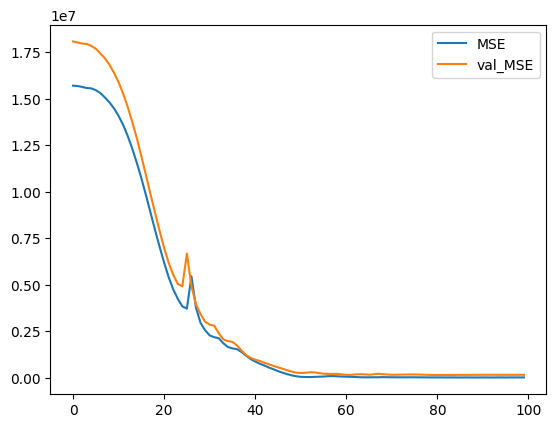

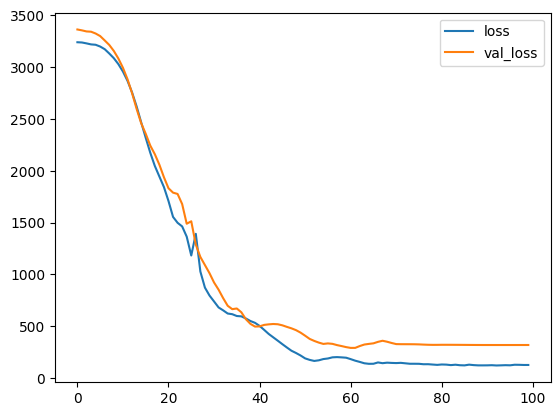

In [66]:
history_seq_df_2[['MSE', 'val_MSE']].plot()
history_seq_df_2[['loss', 'val_loss']].plot()

bisa dilihat dari trend diatas bahwa model lebih stabil dalam mengolah data dan bisa mendapatkan hasil yang lebih baik

hasil terkecil dari model improvement

In [69]:
history_seq_df_2.min()

loss           122.404846
MSE          27697.615234
val_loss       291.882416
val_MSE     162440.218750
lr               0.000080
dtype: float64

data test diprediksi oleh model terbaik dari modelcheckpoint

In [100]:
best_model = load_model(checkpoint_path)
y_pred_2 = best_model.predict(X_test_fit)
y_pred_2.shape

1/1 [==============================] - 0s 444ms/step


(17, 10)

melihat 10 hari terakhir untuk hasil prediksi model

In [101]:
y_pred_df = pd.DataFrame(y_pred_2.round(), columns=symbols)
y_pred_df.tail(10)

,BBCA.JK,TLKM.JK,ASII.JK,BBRI.JK,SIDO.JK,PGAS.JK,ADRO.JK,KAEF.JK,ANTM.JK,INDY.JK
7,9013.0,3673.0,5428.0,4637.0,754.0,1398.0,2562.0,1037.0,2008.0,2115.0
8,9019.0,3676.0,5432.0,4641.0,754.0,1399.0,2563.0,1038.0,2009.0,2116.0
9,9011.0,3673.0,5427.0,4637.0,753.0,1397.0,2561.0,1037.0,2007.0,2114.0
10,9062.0,3694.0,5458.0,4663.0,757.0,1405.0,2576.0,1043.0,2019.0,2126.0
11,9069.0,3697.0,5463.0,4667.0,758.0,1406.0,2578.0,1044.0,2021.0,2128.0
12,9093.0,3707.0,5477.0,4679.0,760.0,1410.0,2584.0,1047.0,2026.0,2133.0
13,9097.0,3708.0,5480.0,4681.0,760.0,1410.0,2586.0,1048.0,2027.0,2134.0
14,9080.0,3701.0,5469.0,4672.0,759.0,1408.0,2581.0,1045.0,2023.0,2130.0
15,9084.0,3703.0,5471.0,4674.0,759.0,1408.0,2582.0,1046.0,2024.0,2131.0
16,9080.0,3701.0,5469.0,4672.0,759.0,1408.0,2581.0,1045.0,2023.0,2130.0


In [102]:
print('Train RMSE:',sqrt(mean_squared_error(y_train,y_pred_train)))
print('Test RMSE:',sqrt(mean_squared_error(y_test,y_pred_2)))

Train RMSE: 160.76641827553829
Test RMSE: 540.9209454840815


bisa dilihat bahwa error model jauh berkurang yang menunjukan model lebih baik walaupun gap antara error train dan test masih cukup besar (+-300) sehingga model masih overfit

# Model Saving

In [103]:
with open('scaler.pkl', 'wb') as file_1:
  pickle.dump(scaler, file_1)

In [104]:
best_model.trainable = False
best_model.save('best_model.h5')

c:\Users\user\anaconda3\envs\tensorCUDA\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Model Inference

melihat hasil prediksi untuk 1 bulan ke depan

In [106]:
y_pred_inf = best_model.predict(X_inf)
y_pred_inf_df = pd.DataFrame(y_pred_inf.round(), columns=symbols)
y_pred_inf_df

1/1 [==============================] - 0s 40ms/step


,BBCA.JK,TLKM.JK,ASII.JK,BBRI.JK,SIDO.JK,PGAS.JK,ADRO.JK,KAEF.JK,ANTM.JK,INDY.JK
0,8523.0,3472.0,5129.0,4384.0,713.0,1322.0,2422.0,978.0,1897.0,1999.0
1,8525.0,3473.0,5130.0,4385.0,714.0,1322.0,2423.0,979.0,1898.0,2000.0
2,8547.0,3481.0,5143.0,4396.0,715.0,1325.0,2429.0,981.0,1902.0,2005.0
3,8521.0,3471.0,5128.0,4383.0,713.0,1322.0,2422.0,978.0,1897.0,1999.0
4,8557.0,3486.0,5150.0,4402.0,716.0,1327.0,2432.0,983.0,1905.0,2007.0
5,8529.0,3474.0,5132.0,4387.0,714.0,1323.0,2424.0,979.0,1899.0,2001.0
6,8557.0,3485.0,5149.0,4401.0,717.0,1328.0,2432.0,982.0,1905.0,2008.0
7,8535.0,3476.0,5135.0,4390.0,715.0,1324.0,2426.0,979.0,1899.0,2002.0
8,8541.0,3479.0,5140.0,4393.0,715.0,1325.0,2428.0,981.0,1901.0,2004.0
9,8535.0,3476.0,5135.0,4390.0,715.0,1324.0,2426.0,979.0,1899.0,2002.0


# Conclusion

menganalisa hasil data inference

In [111]:
for symbol in symbols:
    print(symbol)
    print(f'% Max Change {symbol} : {(y_pred_inf_df[symbol].pct_change().max())*100}%')
    print(f'% Min Change {symbol} : {(y_pred_inf_df[symbol].pct_change().min())*100}%')

BBCA.JK
% Max Change BBCA.JK : 0.42248964309692383%
% Min Change BBCA.JK : -0.33823251724243164%
TLKM.JK
% Max Change TLKM.JK : 0.4321575164794922%
% Min Change TLKM.JK : -0.3442347049713135%
ASII.JK
% Max Change ASII.JK : 0.42902231216430664%
% Min Change ASII.JK : -0.3495156764984131%
BBRI.JK
% Max Change BBRI.JK : 0.43349266052246094%
% Min Change BBRI.JK : -0.34075379371643066%
SIDO.JK
% Max Change SIDO.JK : 0.4207611083984375%
% Min Change SIDO.JK : -0.4178285598754883%
PGAS.JK
% Max Change PGAS.JK : 0.37821531295776367%
% Min Change PGAS.JK : -0.37593841552734375%
ADRO.JK
% Max Change ADRO.JK : 0.41288137435913086%
% Min Change ADRO.JK : -0.3289461135864258%
KAEF.JK
% Max Change KAEF.JK : 0.5112528800964355%
% Min Change KAEF.JK : -0.40691494941711426%
ANTM.JK
% Max Change ANTM.JK : 0.42171478271484375%
% Min Change ANTM.JK : -0.31496286392211914%
INDY.JK
% Max Change INDY.JK : 0.40019750595092773%
% Min Change INDY.JK : -0.3479123115539551%


In [116]:
daily_returns_inf = y_pred_inf_df.pct_change()
volatilitas_inf = (np.std(daily_returns_inf)).round(4)*100
daily_returns_inf.sum()

BBCA.JK    0.000996
TLKM.JK    0.000635
ASII.JK    0.000645
BBRI.JK    0.000744
SIDO.JK    0.001471
PGAS.JK    0.000816
ADRO.JK    0.001294
KAEF.JK    0.000082
ANTM.JK    0.000585
INDY.JK    0.001059
dtype: float32

In [120]:
volatilitas_inf

BBCA.JK    0.20
TLKM.JK    0.20
ASII.JK    0.20
BBRI.JK    0.20
SIDO.JK    0.22
PGAS.JK    0.20
ADRO.JK    0.20
KAEF.JK    0.24
ANTM.JK    0.20
INDY.JK    0.20
dtype: float32

In [113]:
confidence_level = 0.95
var = stats.norm.ppf(1 - confidence_level, loc=np.mean(daily_returns, axis=0), scale=volatilitas)
for i in range(len(symbols)):
    print(f'{symbols[i]} : {var[i].round(2)}')

BBCA.JK : -3.95
TLKM.JK : -2.93
ASII.JK : -2.53
BBRI.JK : -1.94
SIDO.JK : -2.12
PGAS.JK : -4.16
ADRO.JK : -4.12
KAEF.JK : -2.73
ANTM.JK : -2.76
INDY.JK : -2.29


In [119]:
rsi_inf_df = pd.DataFrame()

# Loop melalui setiap saham
for symbol in symbols:
    rsi_indicator = ta.momentum.RSIIndicator(y_pred_inf_df[symbol])
    rsi = rsi_indicator.rsi()
    rsi_inf_df[symbol] = rsi.round(4)

print("RSI inference DataFrame:")
rsi_inf_df.mean()

RSI inference DataFrame:


BBCA.JK    51.891776
TLKM.JK    51.568500
ASII.JK    51.540947
BBRI.JK    51.751565
SIDO.JK    53.129065
PGAS.JK    52.115000
ADRO.JK    51.793229
KAEF.JK    51.074665
ANTM.JK    51.595394
INDY.JK    51.947135
dtype: float64

melihat dari analisa diatas saham yang disarankan untuk dibeli adalah:
- SIDO
- INDY

karena return harian cukup besar dan resiko kerugian cukup kecil

Model improvement sudah cukup bagus dalam memprediksi harga saham, saran untuk pengembangan selanjutnya adalah:
- improvisasi model agar test error lebih mendekati train error
- bisa memprediksi salah satu saham saja